<a href="https://colab.research.google.com/github/tanisha00999/FDS/blob/main/Climatic_Change_on_Food_Supply_Chain_Ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection from NASA Web**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
countries = pd.DataFrame(pd.read_csv('/content/countries.csv'))
emissionall = pd.DataFrame(pd.read_csv('/content/emissionAll.csv'))
cropsyield = pd.DataFrame(pd.read_csv('/content/FAOcrops.csv'))
areayield = pd.DataFrame(pd.read_csv('/content/yield.csv'))

# **Cleaning Data**

Initially, we will retain only countries that have a valid country code and eliminate all other data points.

In [ ]:
countries = countries.drop(['code2','Numeric code','lat','lon','iconCode'], axis=1)
countries.head(10)

,country,code3
0,Albania,ALB
1,Algeria,DZA
2,American Samoa,ASM
3,Andorra,AND
4,Angola,AGO
5,Anguilla,AIA
6,Antarctica,ATA
7,Antigua and Barbuda,ATG
8,Argentina,ARG
9,Armenia,ARM


In [ ]:
countryincludes = ['AFG','AUS','AUT','BGD','BRA','CHL','CHN','COG','FRA','GHA','IND','IDN','IRQ','JPN','JOR','MEX','NZL','KOR','REU','GBR','USA','VNM']
len(countryincludes)

22

In [ ]:
countries[countries.code3.isin(countryincludes)]

,country,code3
11,Australia,AUS
12,Austria,AUT
16,Bangladesh,BGD
28,Brazil,BRA
41,Chile,CHL
42,China,CHN
47,Congo,COG
71,France,FRA
79,Ghana,GHA
98,India,IND


In [ ]:
cropsyield.typeName.unique()

array(['Almonds, with shell Production in tonnes',
       'Anise, badian, fennel, coriander Production in tonnes',
       'Apples Production in tonnes', 'Apricots Production in tonnes',
       'Barley Production in tonnes', 'Berries nes Production in tonnes',
       'Cotton lint Production in tonnes',
       'Cottonseed Production in tonnes', 'Figs Production in tonnes',
       'Fruit, citrus nes Production in tonnes',
       'Fruit, fresh nes Production in tonnes',
       'Fruit, stone nes Production in tonnes',
       'Grapes Production in tonnes', 'Linseed Production in tonnes',
       'Maize Production in tonnes',
       'Melons, other (inc.cantaloupes) Production in tonnes',
       'Millet Production in tonnes', 'Nuts, nes Production in tonnes',
       'Olives Production in tonnes', 'Oranges Production in tonnes',
       'Peaches and nectarines Production in tonnes',
       'Pears Production in tonnes', 'Pistachios Production in tonnes',
       'Plums and sloes Production in tonne

We will streamline our work by initially choosing just 10 crops to proceed with. If necessary, we can always adjust and select additional crops later on.

In [ ]:
cropsincludes = ['Apples Production in tonnes',
                'Maize Production in tonnes',
                'Fruit, fresh nes Production in tonnes',
                'Potatoes Production in tonnes',
                'Rice, paddy Production in tonnes',
               'Vegetables Primary Production in tonnes',
               'Pulses, Total Production in tonnes',
               'Poppy seed Production in tonnes',
               'Sugar beet Production in tonnes',
               'Coffee, green Production in tonnes']
print("Total number of crops = ",len(cropsincludes))
cropsincludes

Total number of crops =  10


['Apples Production in tonnes',
 'Maize Production in tonnes',
 'Fruit, fresh nes Production in tonnes',
 'Potatoes Production in tonnes',
 'Rice, paddy Production in tonnes',
 'Vegetables Primary Production in tonnes',
 'Pulses, Total Production in tonnes',
 'Poppy seed Production in tonnes',
 'Sugar beet Production in tonnes',
 'Coffee, green Production in tonnes']

In [ ]:
selectcrops = cropsyield[cropsyield.typeName.isin(cropsincludes)].copy()
selectcrops.index = range(len(selectcrops))
selectcrops = selectcrops[selectcrops.code3.isin(countryincludes)]
## We also need to eliminate data from countries we don't need!
selectcrops

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Apples Production in tonnes,15100.0,15100.0,15100.0,18400.0,20400.0,22800.0,27600.0,27900.0,...,19992.0,52500.0,59500.0,57343.0,72765.0,59850.0,62041.0,70000.0,78597.0,89403.0
1,AFG,"Fruit, fresh nes Production in tonnes",71200.0,69000.0,71000.0,89000.0,98600.0,110900.0,138400.0,138400.0,...,100251.0,106366.0,107886.0,96000.0,126195.0,100956.0,58891.0,61995.0,63292.0,63375.0
2,AFG,Maize Production in tonnes,700000.0,700000.0,713000.0,720000.0,720000.0,720000.0,768000.0,773000.0,...,315000.0,359000.0,360000.0,360000.0,300000.0,301000.0,300120.0,310000.0,312000.0,316000.0
3,AFG,Potatoes Production in tonnes,130000.0,115000.0,122000.0,129000.0,132000.0,136000.0,147000.0,150000.0,...,300000.0,300000.0,300800.0,280000.0,302400.0,246000.0,205000.0,230000.0,302980.0,340257.0
4,AFG,"Rice, paddy Production in tonnes",319000.0,319000.0,319000.0,380000.0,380000.0,337000.0,396000.0,402000.0,...,485000.0,540000.0,552000.0,612000.0,645000.0,672000.0,672000.0,500000.0,512094.0,537000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,VNM,"Fruit, fresh nes Production in tonnes",860000.0,860000.0,860000.0,860000.0,925000.0,925000.0,925000.0,925000.0,...,2750000.0,2800000.0,2700000.0,2750000.0,2800000.0,2802046.0,2809600.0,2800000.0,2800000.0,2848747.0
1027,VNM,Maize Production in tonnes,292200.0,314085.0,253840.0,319600.0,319100.0,256500.0,253000.0,262000.0,...,3787100.0,3854500.0,4303200.0,4573100.0,4371700.0,4606800.0,4835717.0,4973482.0,5190895.0,5202511.0
1028,VNM,Potatoes Production in tonnes,40000.0,45000.0,50000.0,50000.0,55000.0,60000.0,72000.0,85000.0,...,370000.0,370000.0,372000.0,380000.0,388000.0,354445.0,311604.0,403717.0,313383.0,321700.0
1029,VNM,"Rice, paddy Production in tonnes",8997400.0,9747040.0,9622670.0,9697030.0,9369700.0,8463500.0,9188400.0,8366150.0,...,35832900.0,35849500.0,35942700.0,38729800.0,38950200.0,40005600.0,42398344.0,43737598.0,44040457.0,44974206.0


In [ ]:
areayield.typeName.unique()

array(['Almonds, with shell yield in hg/ha',
       'Anise, badian, fennel, coriander yield in hg/ha',
       'Apples yield in hg/ha', 'Apricots yield in hg/ha',
       'Barley yield in hg/ha', 'Berries nes yield in hg/ha',
       'Figs yield in hg/ha', 'Fruit, citrus nes yield in hg/ha',
       'Fruit, fresh nes yield in hg/ha',
       'Fruit, stone nes yield in hg/ha', 'Grapes yield in hg/ha',
       'Linseed yield in hg/ha', 'Maize yield in hg/ha',
       'Melons, other (inc.cantaloupes) yield in hg/ha',
       'Millet yield in hg/ha', 'Nuts, nes yield in hg/ha',
       'Olives yield in hg/ha', 'Oranges yield in hg/ha',
       'Peaches and nectarines yield in hg/ha', 'Pears yield in hg/ha',
       'Pistachios yield in hg/ha', 'Plums and sloes yield in hg/ha',
       'Potatoes yield in hg/ha', 'Pulses, nes yield in hg/ha',
       'Rice, paddy yield in hg/ha', 'Seed cotton yield in hg/ha',
       'Sesame seed yield in hg/ha', 'Sugar beet yield in hg/ha',
       'Sugar cane yield in hg

In [ ]:
areaincludes = ['Apples yield in hg/ha',
                'Maize yield in hg/ha',
                'Fruit, fresh nes yield in hg/ha',
                'Potatoes yield in hg/ha',
                'Rice, paddy yield in hg/ha',
               'Vegetables Primary yield in hg/ha',
               'Pulses, Total yield in hg/ha',
               'Poppy seed yield in hg/ha',
               'Sugar beet yield in hg/ha',
               'Coffee, green yield in hg/ha']
print("Total number of crops = ", len(areaincludes))
areaincludes

Total number of crops =  10


['Apples yield in hg/ha',
 'Maize yield in hg/ha',
 'Fruit, fresh nes yield in hg/ha',
 'Potatoes yield in hg/ha',
 'Rice, paddy yield in hg/ha',
 'Vegetables Primary yield in hg/ha',
 'Pulses, Total yield in hg/ha',
 'Poppy seed yield in hg/ha',
 'Sugar beet yield in hg/ha',
 'Coffee, green yield in hg/ha']

In [ ]:
selectarea = areayield[areayield.typeName.isin(areaincludes)]
selectarea.index = range(len(selectarea))
selectarea = selectarea[selectarea.code3.isin(countryincludes)]
selectarea

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Apples yield in hg/ha,68018.0,68018.0,68018.0,78298.0,82258.0,83212.0,90196.0,93311.0,...,72672.0,75000.0,85000.0,81919.0,85105.0,70000.0,70000.0,76519.0,76005.0,73000.0
1,AFG,"Fruit, fresh nes yield in hg/ha",51153.0,50109.0,52129.0,60544.0,63984.0,66607.0,71047.0,75299.0,...,99235.0,103347.0,107886.0,120000.0,150000.0,120000.0,70000.0,73690.0,74902.0,75000.0
2,AFG,Maize yield in hg/ha,14000.0,14000.0,14260.0,14257.0,14400.0,14400.0,14144.0,17064.0,...,12069.0,26204.0,26277.0,26277.0,21429.0,16448.0,16400.0,21986.0,21972.0,24882.0
3,AFG,Potatoes yield in hg/ha,86667.0,76667.0,81333.0,86000.0,88000.0,90667.0,98000.0,100000.0,...,150000.0,150000.0,150400.0,140000.0,140000.0,120000.0,100000.0,109524.0,131960.0,136054.0
4,AFG,"Rice, paddy yield in hg/ha",15190.0,15190.0,15190.0,17273.0,17273.0,15180.0,19223.0,19515.0,...,30313.0,33750.0,32471.0,32211.0,32250.0,32308.0,32000.0,24390.0,24980.0,24409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,VNM,"Fruit, fresh nes yield in hg/ha",86000.0,86000.0,86000.0,86000.0,88095.0,88095.0,88095.0,88095.0,...,122222.0,121739.0,117391.0,117021.0,117441.0,117445.0,117367.0,116667.0,116667.0,117521.0
1104,VNM,Maize yield in hg/ha,11230.0,11987.0,9307.0,12436.0,11503.0,9589.0,11000.0,10962.0,...,35979.0,37310.0,39259.0,31753.0,40137.0,40899.0,43128.0,43019.0,44354.0,44140.0
1105,VNM,Potatoes yield in hg/ha,133333.0,150000.0,166667.0,166667.0,137500.0,150000.0,180000.0,170000.0,...,105714.0,105714.0,103333.0,105556.0,104865.0,120448.0,137810.0,146352.0,135800.0,140954.0
1106,VNM,"Rice, paddy yield in hg/ha",18966.0,19937.0,21400.0,19441.0,19414.0,18079.0,19159.0,17095.0,...,48891.0,48943.0,49869.0,52336.0,52372.0,53416.0,55383.0,56353.0,55728.0,57538.0


We have completed the process of refining and choosing the crop production and yield data for the specific set of 10 crops and 22 countries we require.

In [ ]:
emissionall

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Cereals excluding rice Emissions (CO2eq) gigag...,402.2165,408.3269,385.7396,406.7923,410.0940,392.3671,410.4523,415.6880,...,540.4174,513.3178,558.5772,399.9802,622.9562,569.4834,502.1896,930.8129,765.7361,754.5742
1,AFG,"Rice, paddy Emissions (CO2eq) gigagrams",665.5675,665.5675,665.5675,699.3576,699.3576,703.5647,660.1999,662.6412,...,528.8122,541.7134,564.2252,626.8125,664.4793,689.6050,703.0602,752.4373,708.0396,747.5037
2,AFG,"Meat, cattle Emissions (CO2eq) gigagrams",1576.9262,1791.9616,1806.2973,1842.1366,1813.4652,1892.3115,1820.6330,1829.9512,...,804.9492,938.9879,972.6768,1035.7538,1018.5510,1270.8592,1235.7367,891.6801,856.5577,875.2105
3,AFG,"Milk, whole fresh cow Emissions (CO2eq) gigagrams",1172.1377,1172.1377,1306.0963,1306.0963,1456.7998,1607.5032,1774.9514,1808.4411,...,4353.6544,4688.5509,5023.4474,5525.7922,5525.7922,6530.4817,6363.0334,6697.9299,6764.9092,6912.2253
4,AFG,"Meat, goat Emissions (CO2eq) gigagrams",717.8808,693.8384,607.4048,543.4226,454.2740,454.2740,428.6811,407.9935,...,1008.1470,969.5444,666.9083,879.9692,757.1233,970.1842,1116.4903,1068.7168,1026.0620,1032.4997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,NaN,"Meat, sheep Emissions (CO2eq) gigagrams",100094.9131,100956.8895,100250.6196,102180.5798,104878.1331,101512.8637,104055.8301,104486.5320,...,75468.9210,71449.0541,69019.7561,64830.2671,60859.8077,58114.6958,59244.1140,59709.9454,60282.1769,59285.9561
2478,NaN,"Milk, whole fresh sheep Emissions (CO2eq) giga...",7680.8570,7562.0886,7539.5080,7483.7982,7398.1743,7562.1037,7738.3715,7800.4545,...,6509.2819,6991.4963,6859.9302,6698.3192,6843.9333,7056.2252,7168.5592,7415.0377,7567.9965,7573.5987
2479,NaN,"Meat, chicken Emissions (CO2eq) gigagrams",3528.9147,3677.4469,3810.0061,3995.5273,4215.6517,4269.5149,4566.9618,4783.2850,...,12899.8282,13154.8502,13502.3056,12986.1799,12774.0719,12794.1352,12450.0775,12502.1297,13297.4897,13438.4809
2480,NaN,"Eggs, hen, in shell Emissions (CO2eq) gigagrams",7700.1898,7846.7287,7982.2097,8302.5666,8366.2888,8436.2494,8701.2887,8739.5245,...,10090.1013,10119.9592,10162.4282,10256.1073,10249.1886,10527.1569,10473.4317,10582.5336,10819.4192,10923.2089


In [ ]:
countryemission = emissionall[emissionall.code3.isin(countryincludes)]
countryemission

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Cereals excluding rice Emissions (CO2eq) gigag...,402.2165,408.3269,385.7396,406.7923,410.0940,392.3671,410.4523,415.6880,...,540.4174,513.3178,558.5772,399.9802,622.9562,569.4834,502.1896,930.8129,765.7361,754.5742
1,AFG,"Rice, paddy Emissions (CO2eq) gigagrams",665.5675,665.5675,665.5675,699.3576,699.3576,703.5647,660.1999,662.6412,...,528.8122,541.7134,564.2252,626.8125,664.4793,689.6050,703.0602,752.4373,708.0396,747.5037
2,AFG,"Meat, cattle Emissions (CO2eq) gigagrams",1576.9262,1791.9616,1806.2973,1842.1366,1813.4652,1892.3115,1820.6330,1829.9512,...,804.9492,938.9879,972.6768,1035.7538,1018.5510,1270.8592,1235.7367,891.6801,856.5577,875.2105
3,AFG,"Milk, whole fresh cow Emissions (CO2eq) gigagrams",1172.1377,1172.1377,1306.0963,1306.0963,1456.7998,1607.5032,1774.9514,1808.4411,...,4353.6544,4688.5509,5023.4474,5525.7922,5525.7922,6530.4817,6363.0334,6697.9299,6764.9092,6912.2253
4,AFG,"Meat, goat Emissions (CO2eq) gigagrams",717.8808,693.8384,607.4048,543.4226,454.2740,454.2740,428.6811,407.9935,...,1008.1470,969.5444,666.9083,879.9692,757.1233,970.1842,1116.4903,1068.7168,1026.0620,1032.4997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,VNM,"Meat, buffalo Emissions (CO2eq) gigagrams",3959.0307,3987.9648,4135.1052,4197.7369,4118.5210,4239.9031,4054.4779,4059.4179,...,5099.0251,5096.3871,5228.2493,5055.8798,5034.5320,5019.3593,4728.2541,4579.7252,4461.0354,4375.0942
1983,VNM,"Milk, whole fresh buffalo Emissions (CO2eq) gi...",14.1142,14.1142,14.1142,14.1142,17.6427,17.6427,21.1713,21.1713,...,56.4568,57.0570,58.2210,56.4568,58.2210,56.4568,56.4568,56.4568,54.6925,56.5855
1984,VNM,"Meat, chicken Emissions (CO2eq) gigagrams",85.7415,94.4821,135.6879,107.8011,124.8662,109.4660,107.8011,118.6229,...,440.9317,395.5095,446.1885,504.0848,566.0580,630.9963,648.5550,635.7599,678.4771,711.6590
1985,VNM,"Eggs, hen, in shell Emissions (CO2eq) gigagrams",84.5900,86.3898,88.1896,91.1892,95.9886,98.9883,101.9879,95.9886,...,287.9659,331.1368,305.9638,311.9631,383.9545,399.5527,419.9503,425.9496,428.9492,449.9276


First, let's examine how categorical emissions are distributed across countries.

In [ ]:
for i in set(countryemission.typeName.values):
    print(i, np.count_nonzero(countryemission.typeName.values[countryemission.typeName.values == i]))

Milk, whole fresh goat Emissions (CO2eq) gigagrams 14
Meat, goat Emissions (CO2eq) gigagrams 20
Milk, whole fresh cow Emissions (CO2eq) gigagrams 22
Meat, pig Emissions (CO2eq) gigagrams 18
Meat, buffalo Emissions (CO2eq) gigagrams 6
Meat, cattle Emissions (CO2eq) gigagrams 22
Cereals excluding rice Emissions (CO2eq) gigagrams 22
Milk, whole fresh buffalo Emissions (CO2eq) gigagrams 5
Milk, whole fresh sheep Emissions (CO2eq) gigagrams 8
Meat, chicken Emissions (CO2eq) gigagrams 22
Rice, paddy Emissions (CO2eq) gigagrams 18
Eggs, hen, in shell Emissions (CO2eq) gigagrams 22
Meat, sheep Emissions (CO2eq) gigagrams 21
Milk, whole fresh camel Emissions (CO2eq) gigagrams 3


We've observed that certain categorical emissions data is missing for some countries. To facilitate visualization and calculate total emissions consistently, we will standardize the categories and exclude those that are not available in the majority of countries. We will focus on emissions present in more than 70% of countries, which is a minimum of 16 countries.

In [ ]:
emissionincludes = ['Meat, cattle Emissions (CO2eq) gigagrams','Rice, paddy Emissions (CO2eq) gigagrams',
                    'Meat, sheep Emissions (CO2eq) gigagrams','Eggs, hen, in shell Emissions (CO2eq) gigagrams',
                    'Meat, goat Emissions (CO2eq) gigagrams','Cereals excluding rice Emissions (CO2eq) gigagrams',
                   'Meat, pig Emissions (CO2eq) gigagrams','Meat, chicken Emissions (CO2eq) gigagrams',
                   'Milk, whole fresh cow Emissions (CO2eq) gigagrams']

print("We have a total of {0} to be included in future use. ".format(len(emissionincludes)))

We have a total of 9 to be included in future use. 


In [ ]:
selectemission = countryemission[countryemission.typeName.isin(emissionincludes)]
selectemission.index = range(len(selectemission))
selectemission

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Cereals excluding rice Emissions (CO2eq) gigag...,402.2165,408.3269,385.7396,406.7923,410.0940,392.3671,410.4523,415.6880,...,540.4174,513.3178,558.5772,399.9802,622.9562,569.4834,502.1896,930.8129,765.7361,754.5742
1,AFG,"Rice, paddy Emissions (CO2eq) gigagrams",665.5675,665.5675,665.5675,699.3576,699.3576,703.5647,660.1999,662.6412,...,528.8122,541.7134,564.2252,626.8125,664.4793,689.6050,703.0602,752.4373,708.0396,747.5037
2,AFG,"Meat, cattle Emissions (CO2eq) gigagrams",1576.9262,1791.9616,1806.2973,1842.1366,1813.4652,1892.3115,1820.6330,1829.9512,...,804.9492,938.9879,972.6768,1035.7538,1018.5510,1270.8592,1235.7367,891.6801,856.5577,875.2105
3,AFG,"Milk, whole fresh cow Emissions (CO2eq) gigagrams",1172.1377,1172.1377,1306.0963,1306.0963,1456.7998,1607.5032,1774.9514,1808.4411,...,4353.6544,4688.5509,5023.4474,5525.7922,5525.7922,6530.4817,6363.0334,6697.9299,6764.9092,6912.2253
4,AFG,"Meat, goat Emissions (CO2eq) gigagrams",717.8808,693.8384,607.4048,543.4226,454.2740,454.2740,428.6811,407.9935,...,1008.1470,969.5444,666.9083,879.9692,757.1233,970.1842,1116.4903,1068.7168,1026.0620,1032.4997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,VNM,"Milk, whole fresh cow Emissions (CO2eq) gigagrams",24.2932,24.2932,26.7225,26.7225,29.1518,32.5529,34.9822,32.6744,...,252.9409,275.0356,354.4379,262.3254,280.6303,286.6599,291.5185,308.5237,369.2568,374.8115
183,VNM,"Meat, goat Emissions (CO2eq) gigagrams",32.1801,33.2528,34.3255,34.9691,36.4708,37.5435,40.7615,40.7615,...,281.9193,327.2290,381.3559,318.2614,295.0128,276.3953,271.9864,288.2571,299.1911,343.3137
184,VNM,"Meat, chicken Emissions (CO2eq) gigagrams",85.7415,94.4821,135.6879,107.8011,124.8662,109.4660,107.8011,118.6229,...,440.9317,395.5095,446.1885,504.0848,566.0580,630.9963,648.5550,635.7599,678.4771,711.6590
185,VNM,"Eggs, hen, in shell Emissions (CO2eq) gigagrams",84.5900,86.3898,88.1896,91.1892,95.9886,98.9883,101.9879,95.9886,...,287.9659,331.1368,305.9638,311.9631,383.9545,399.5527,419.9503,425.9496,428.9492,449.9276


In [ ]:


cumemission = pd.DataFrame(data=np.zeros((22, 56)), columns=selectemission.columns)

# First, let us insert country codes in cumemission -> cumulative emission.
cumemission['code3'] = selectemission['code3'].unique()
cumemission['typeName'] = "Total emissions (CO2eq) giga"

# An empty array first, we'll add up emissions, year-wise for each country and store temporary value here.
arr = np.zeros([1, 54])

for i in range(len(cumemission['code3'])):
    for j in range(2, 56):
        # To add the emissions per country per year, the sum for each year will be stored in a new array.
        arr[0, j - 2] = np.sum(selectemission[selectemission['code3'] == cumemission['code3'][i]].iloc[:, j:j + 1].values)
    # Now let us update our DataFrame with the cumulative values for each year
    cumemission.iloc[i, 2:] = arr[0]

# The resulting cumemission DataFrame now contains cumulative emissions year-wise for each country.


In [ ]:
cumemission


,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Total emissions (CO2eq) giga,6885.7310,7107.7665,7132.1979,7168.2532,7278.1348,7823.5971,7785.3317,7979.3527,...,8363.4006,8620.7858,8110.6622,9342.6085,9832.4809,11381.2585,11414.8868,11779.4238,11370.4718,11659.6418
1,AUS,Total emissions (CO2eq) giga,89090.0569,92403.7869,93869.2530,96766.2748,97845.0959,92499.4523,95050.3737,98582.6840,...,101572.7538,97348.9365,94444.5868,91496.7516,90687.2766,87219.2598,93790.4086,94792.9850,96670.2839,96182.6188
2,AUT,Total emissions (CO2eq) giga,7926.6443,8131.1910,8044.2959,7838.8466,7975.5536,8073.6385,8338.0864,8400.9394,...,6507.9305,6422.0504,6328.4397,6437.8537,6332.5697,6455.4712,6473.3282,6315.5958,6264.3948,6303.6497
3,BGD,Total emissions (CO2eq) giga,37332.0343,38316.4501,39765.7318,41678.4903,41674.9078,41781.1183,44259.6147,44434.8724,...,56636.1736,57604.9059,57605.5242,60834.1430,60370.1489,61071.5201,62057.9634,61411.7431,60620.5438,60638.2549
4,BRA,Total emissions (CO2eq) giga,112822.9183,116285.5312,120642.4140,125034.5859,129951.8365,133118.6594,137703.3903,142324.7338,...,387393.0150,384931.3508,378097.7311,382249.3362,389556.2715,398678.7456,407033.7404,403335.9530,403515.4715,405071.0393
5,CHL,Total emissions (CO2eq) giga,6925.9889,6962.8952,6896.4999,6983.0525,7054.6801,7241.9384,7527.2505,7193.1138,...,9969.5113,9825.1890,9670.7458,9998.3261,9928.2939,9850.4420,9535.8606,9568.4844,8240.9406,7956.2392
6,CHN,Total emissions (CO2eq) giga,224964.5485,226469.0764,237088.4534,252668.0792,263716.0500,274379.0981,278043.0281,278623.2811,...,533771.1873,546675.2763,554012.8220,560622.6871,567621.4445,576235.3760,565158.5918,568688.8543,570495.8975,579494.6594
7,COG,Total emissions (CO2eq) giga,63.3334,64.8623,70.7873,75.2544,72.9848,69.5540,66.8513,73.0808,...,346.7065,404.4089,463.6252,496.6970,488.8522,511.6318,521.7515,525.7223,528.5413,530.0933
8,FRA,Total emissions (CO2eq) giga,59305.4919,61740.3773,60846.1651,60488.2206,61433.1111,62219.5569,64593.6960,66125.4776,...,60165.4598,60112.8314,60584.1453,60995.9529,59859.3297,59269.8234,57822.1165,59522.0176,58124.7927,59707.5683
9,GHA,Total emissions (CO2eq) giga,1115.4108,1206.0178,1284.4736,1489.8119,1557.4962,1603.8849,1721.7987,1803.4876,...,3813.0693,3999.3339,4040.5752,4195.2929,4423.4383,4601.5946,4732.3756,5035.3265,5263.5996,5466.9916


Here is a summary of the outcomes of the cleaning process:

DataFrames:
1. **selectcrops**: Provides data on crop production in tonnes per country.
2. **selectarea**: Contains information about crop yield area in hg/ha per country.
3. **selectemission**: Represents categorical emissions data per country.
4. **cumemission**: Shows cumulative emissions data per country.

Lists:
1. **countryincludes**: This list includes the selected countries for analysis.
2. **cropsincludes**: Lists the selected crops based on their production in tonnes.
3. **areaincludes**: Includes a list of selected crops based on their yield in hg/ha.
4. **emissionincludes**: Lists the chosen emission categories for analysis.

These dataframes and lists have been carefully curated and prepared for further analysis and visualization.

# **Data Visualisation**

In [ ]:
def plotcountryfood(code):
    countrydf = selectarea.loc[selectarea['code3'] == code]
    year_data = countrydf.columns[2:]
    countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
    countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')
    x = countrydf['typeName']
    y= countrydf['Average Production']

    fig = plt.figure(figsize = (10, 5))

  # creating the bar plot
    plt.bar(x, y, color ='Green')

    plt.xlabel("Crop Produced")
    plt.ylabel("Average Production from 1961 to 2014 in Hg/Ha")
    plt.title("Identifying the prime crop produced for {}".format(code))
    plt.xticks(rotation=90)
    plt.show()

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


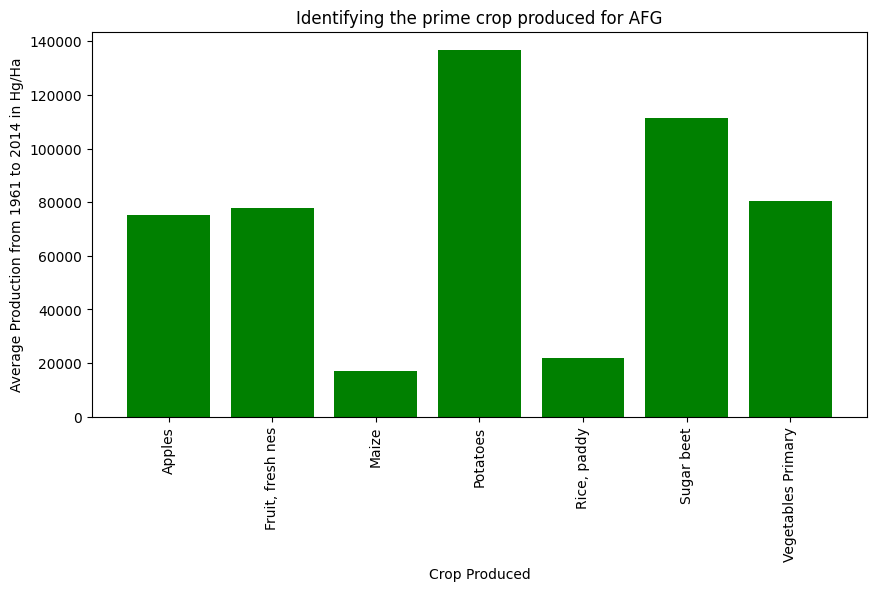

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


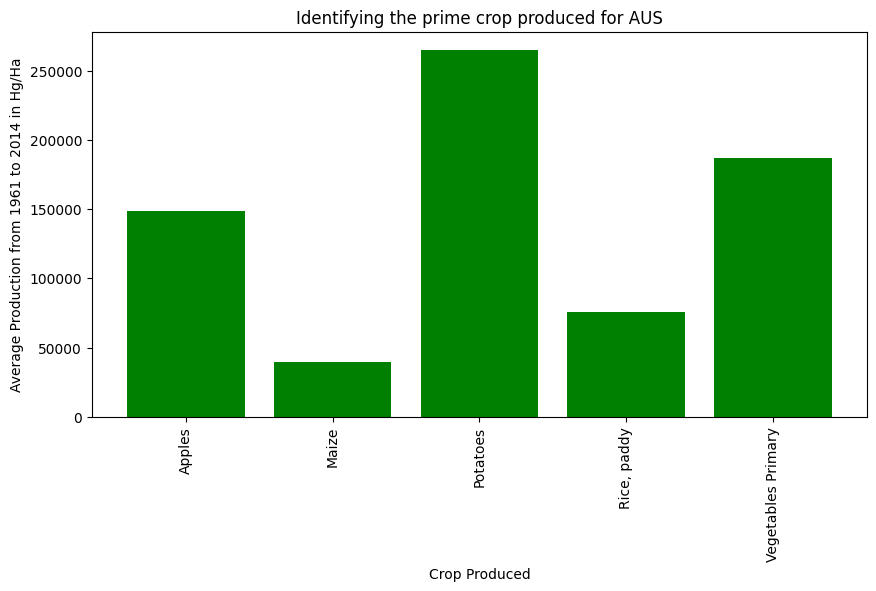

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


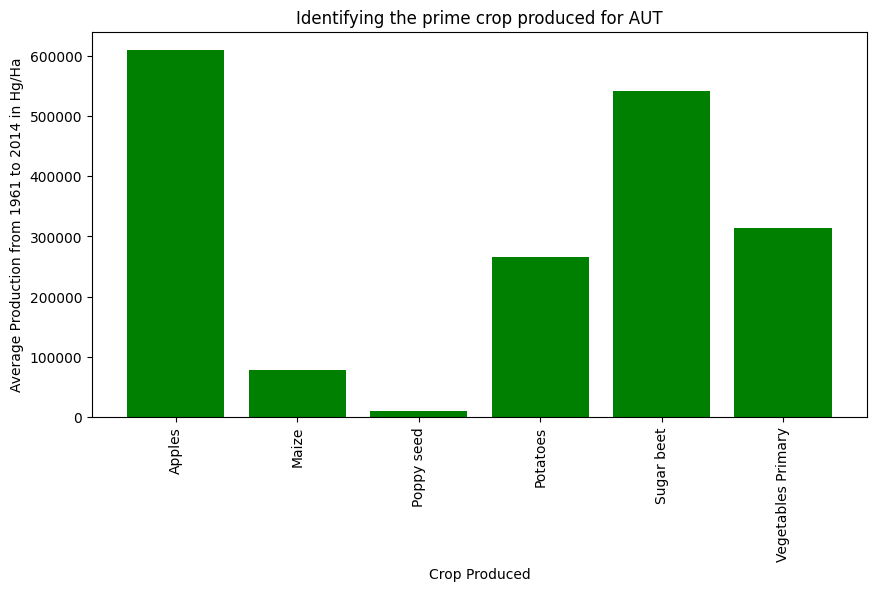

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


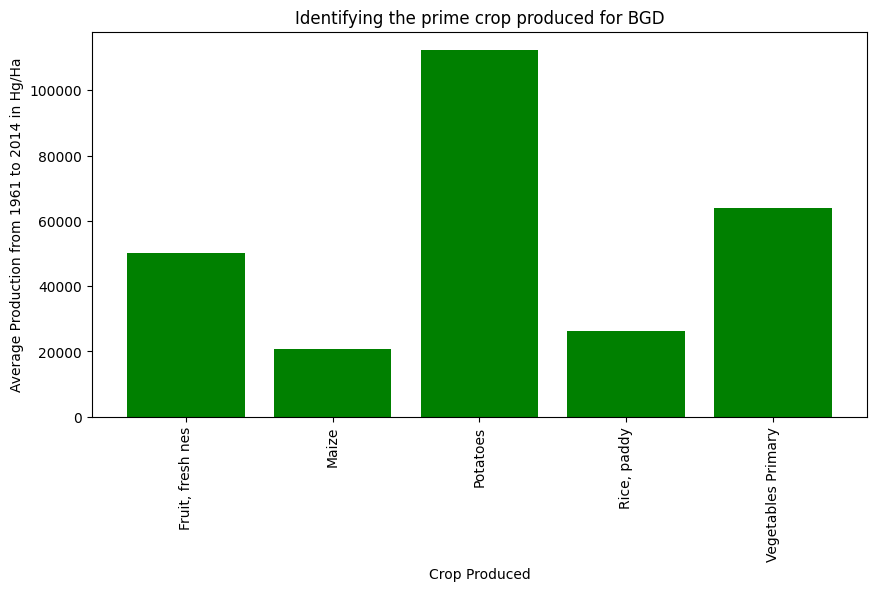

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


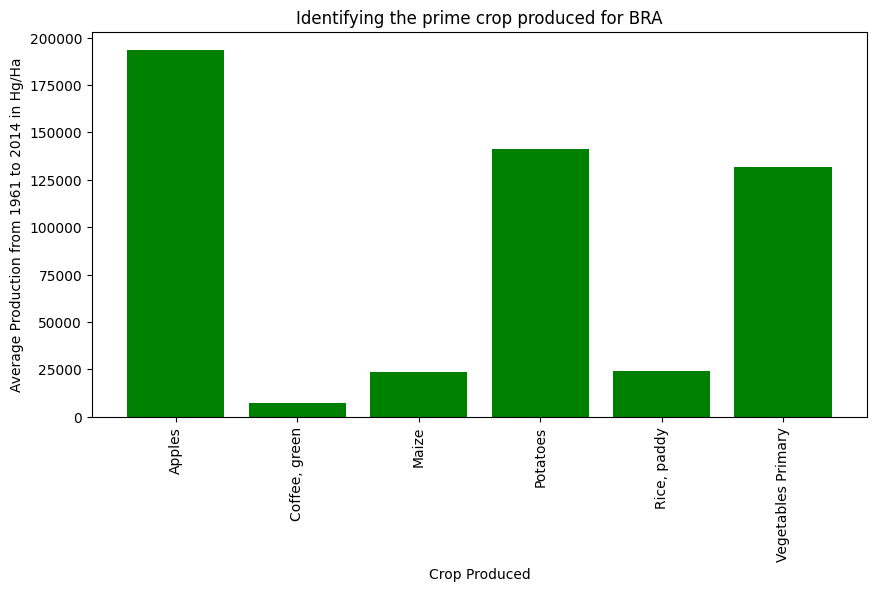

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


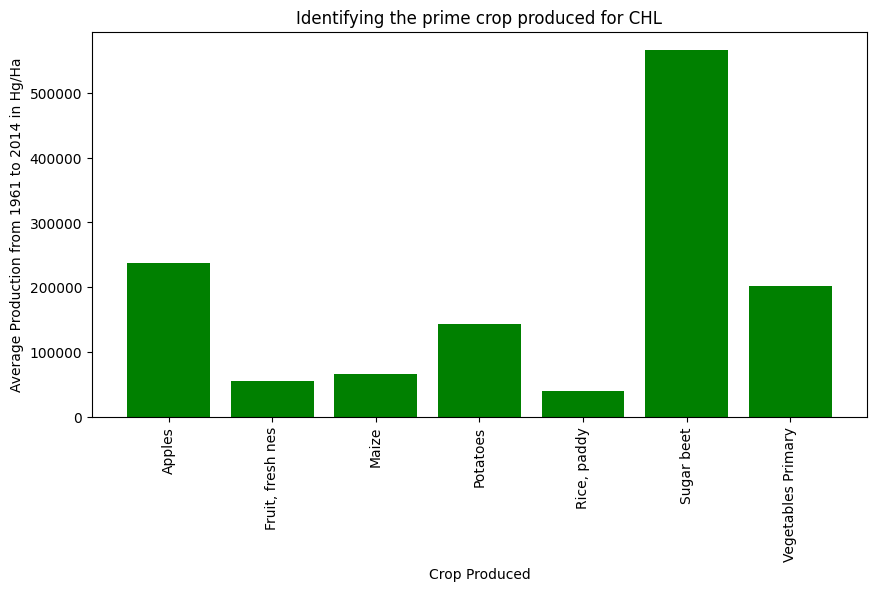

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


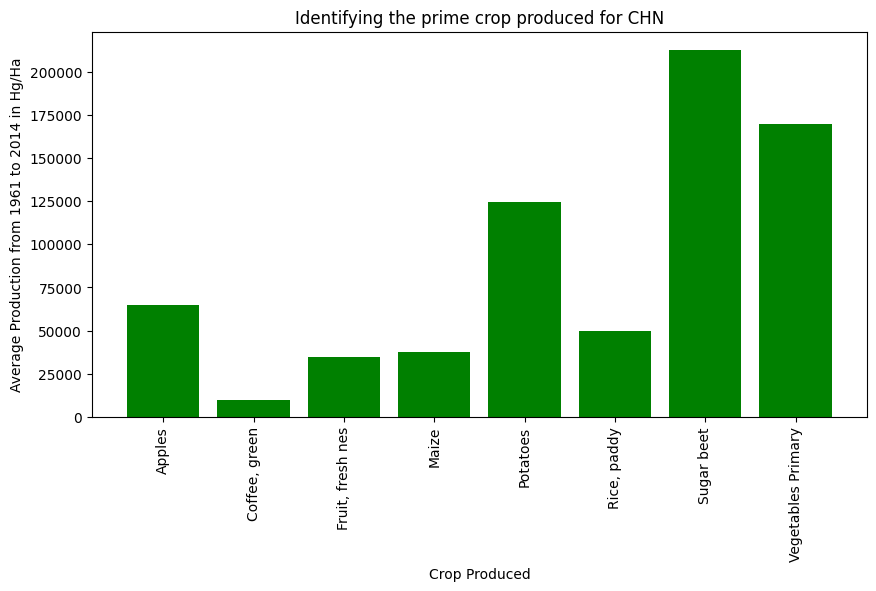

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


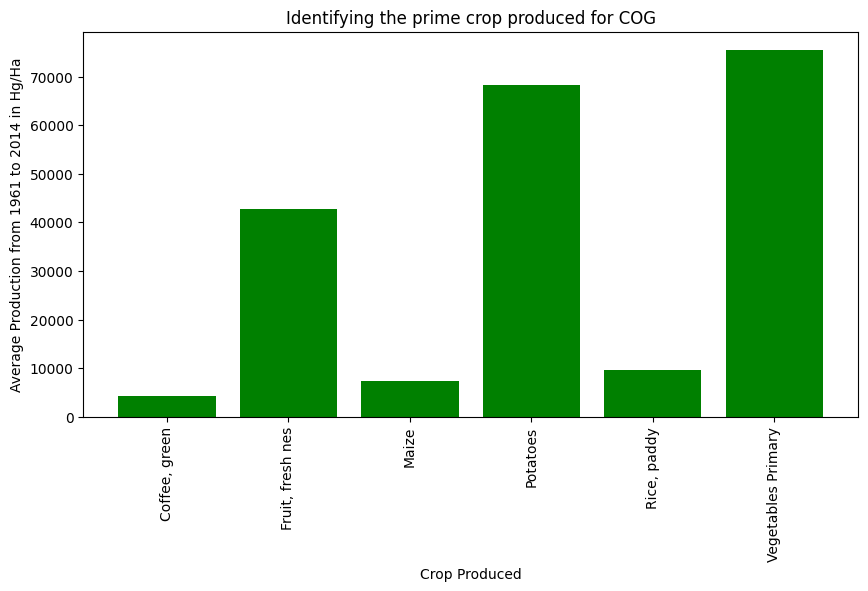

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


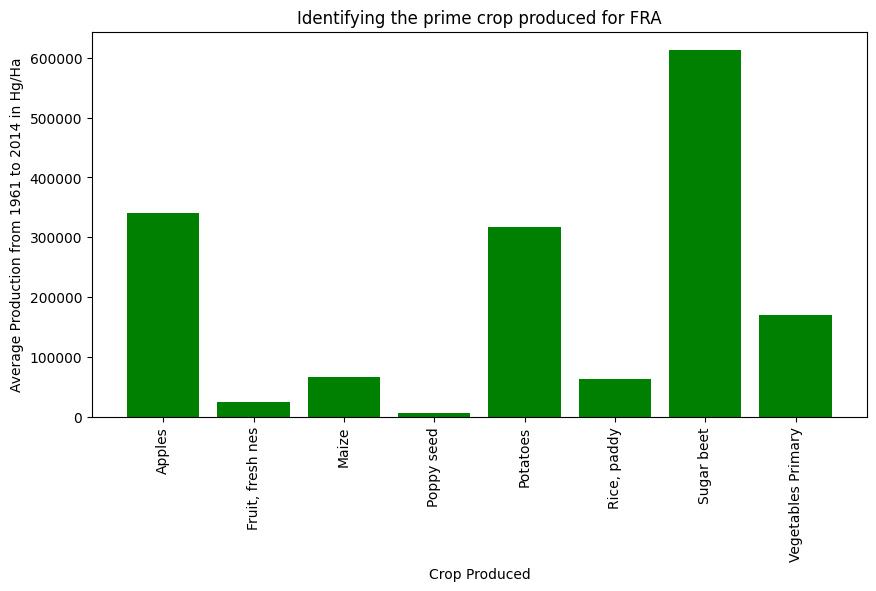

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


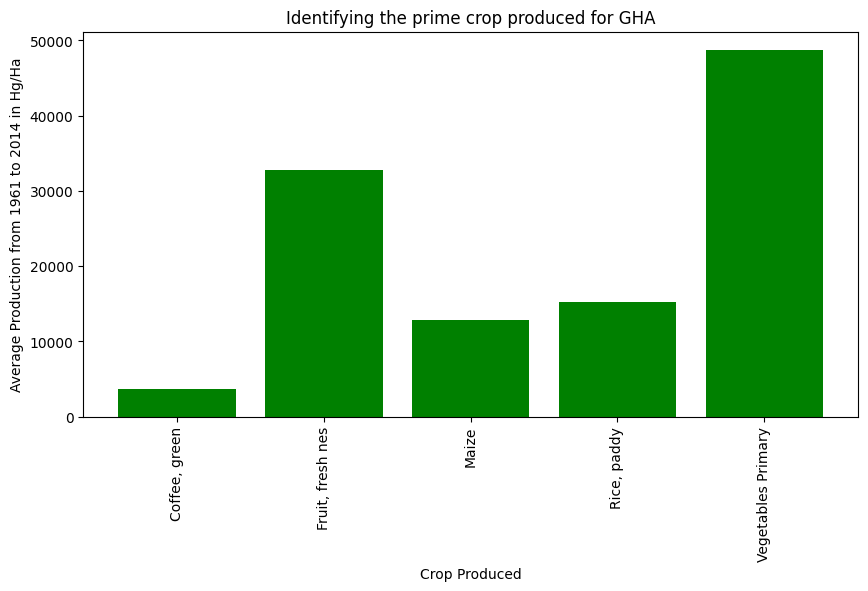

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


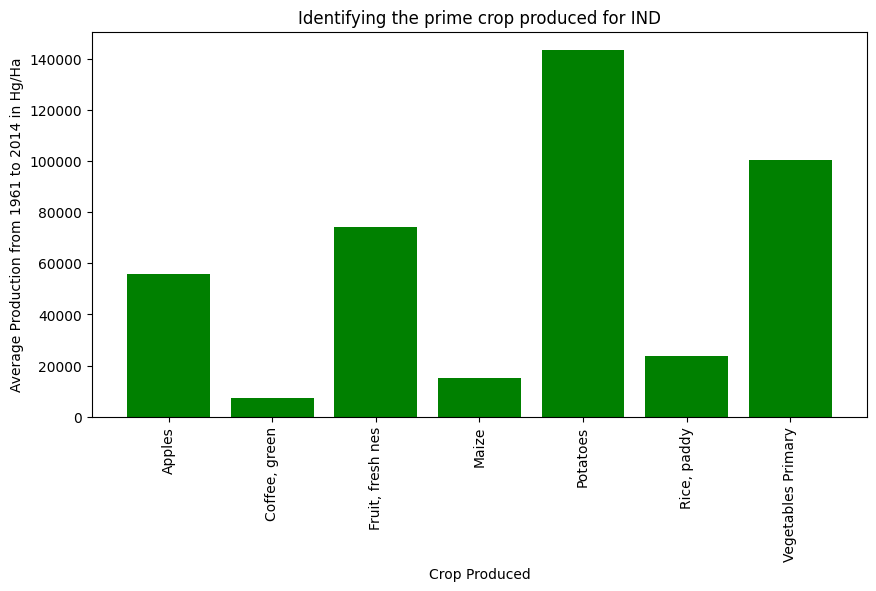

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


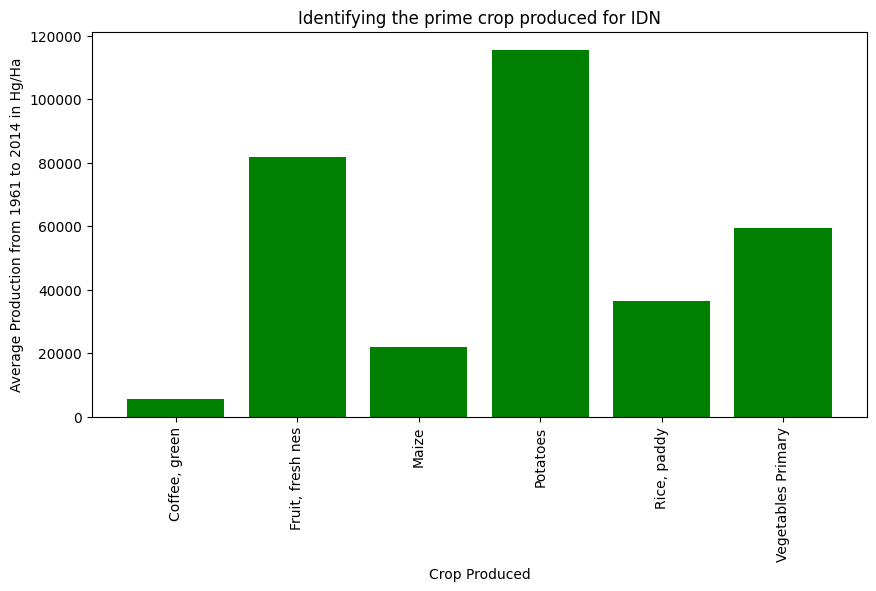

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


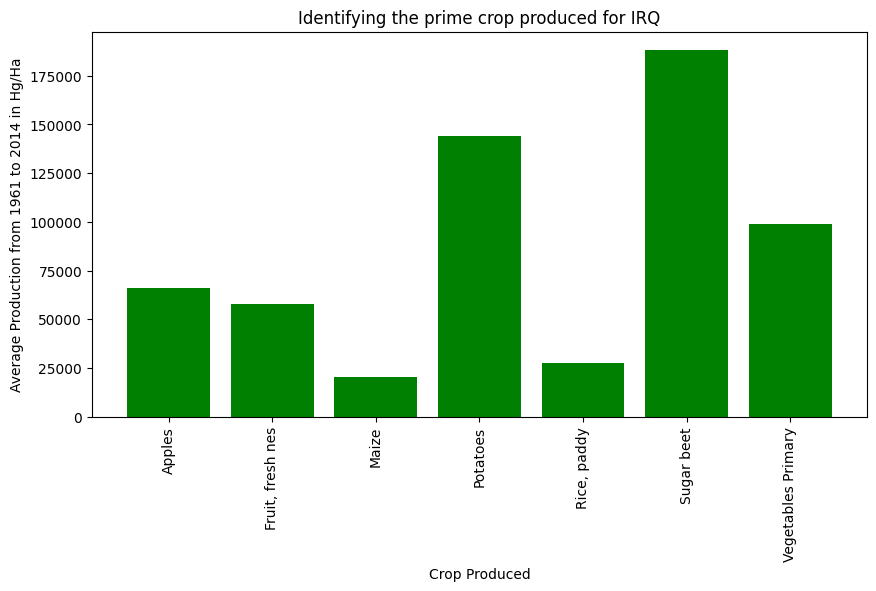

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


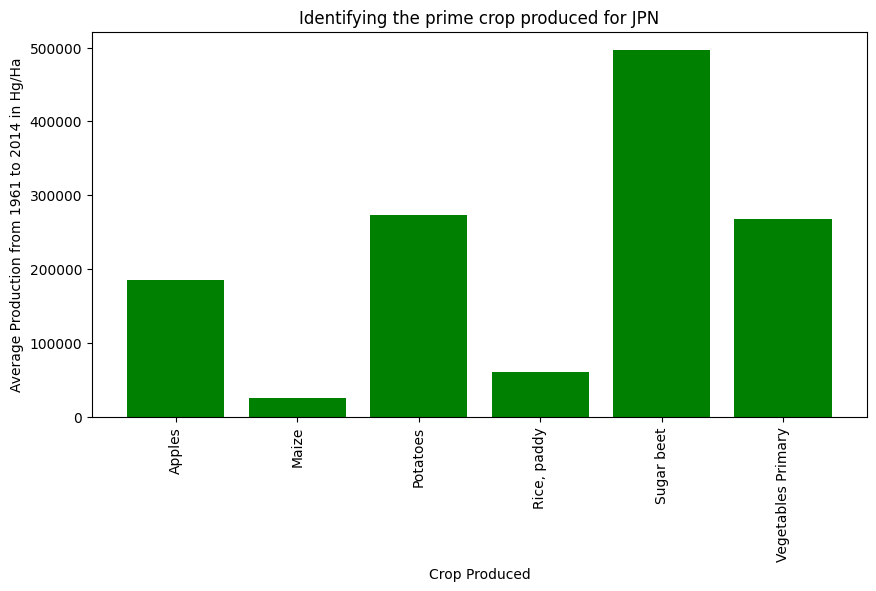

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


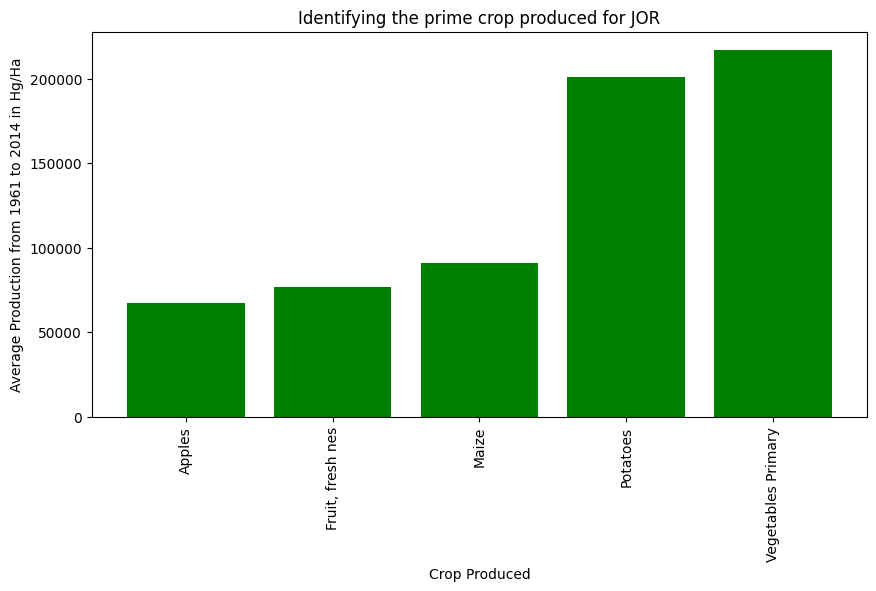

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


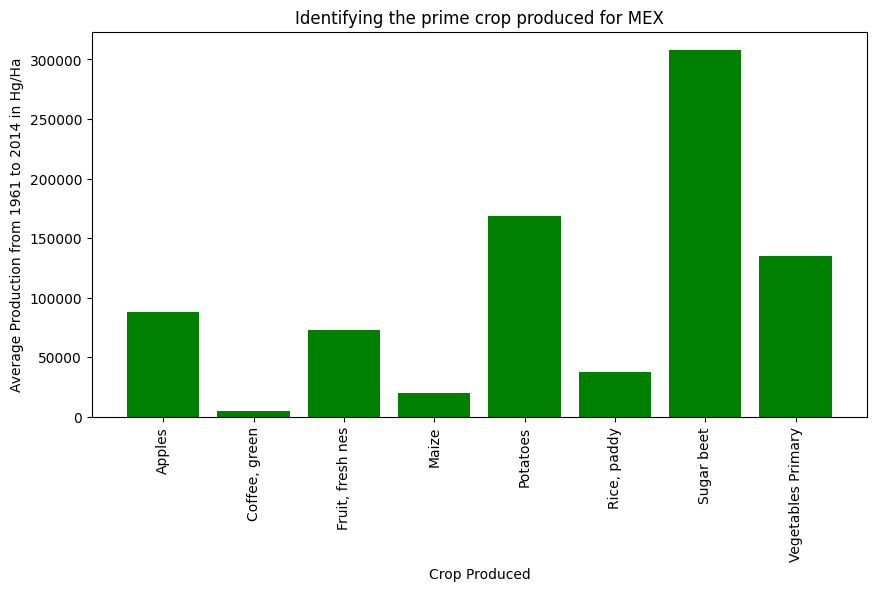

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


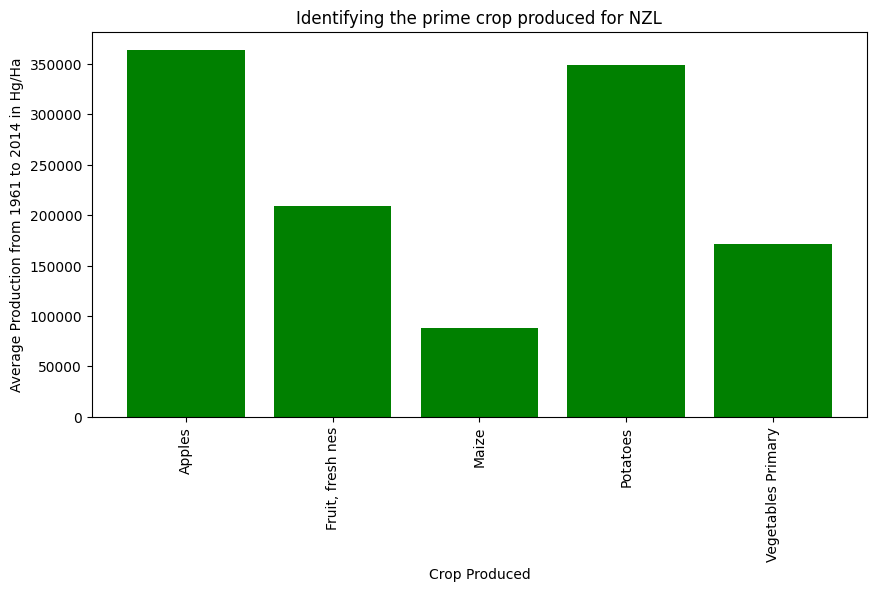

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


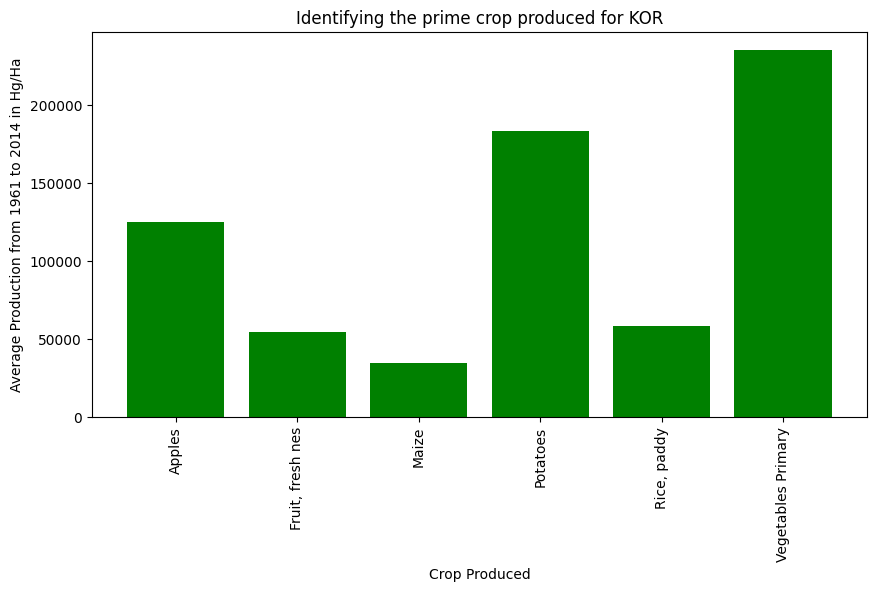

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


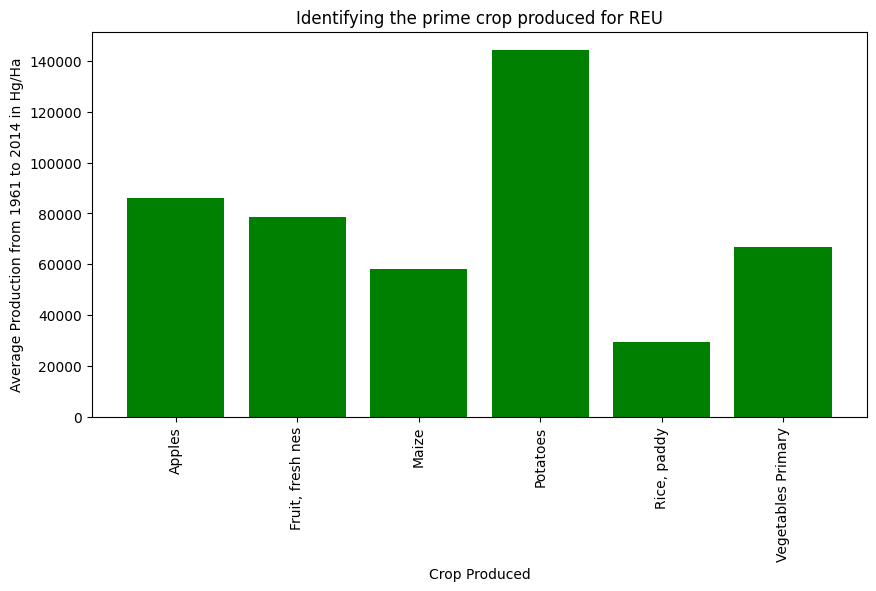

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


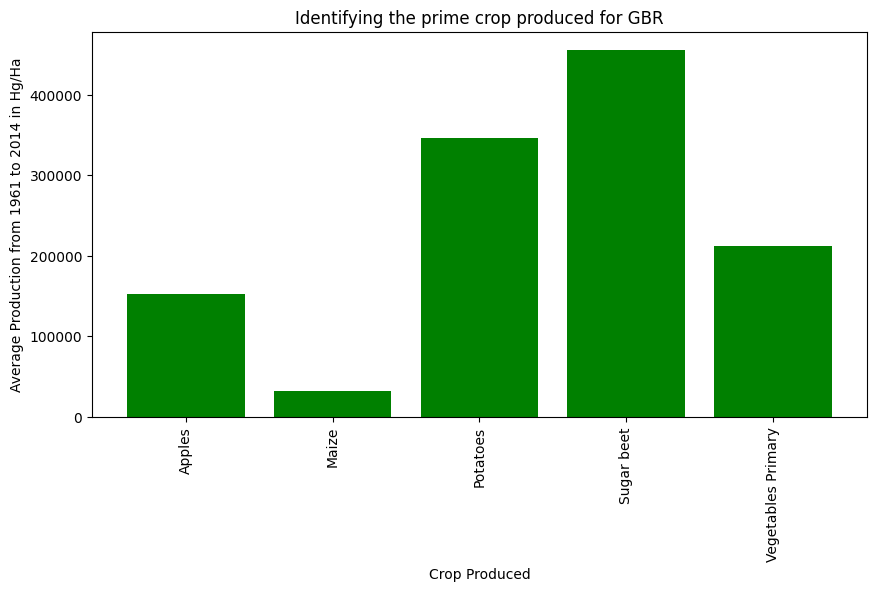

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


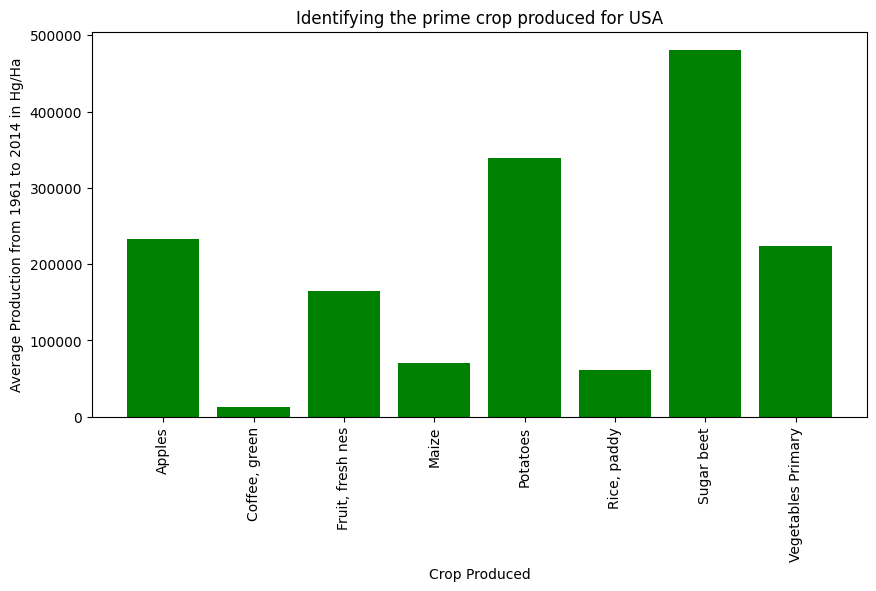

<ipython-input-22-f67ad666e51a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-22-f67ad666e51a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')


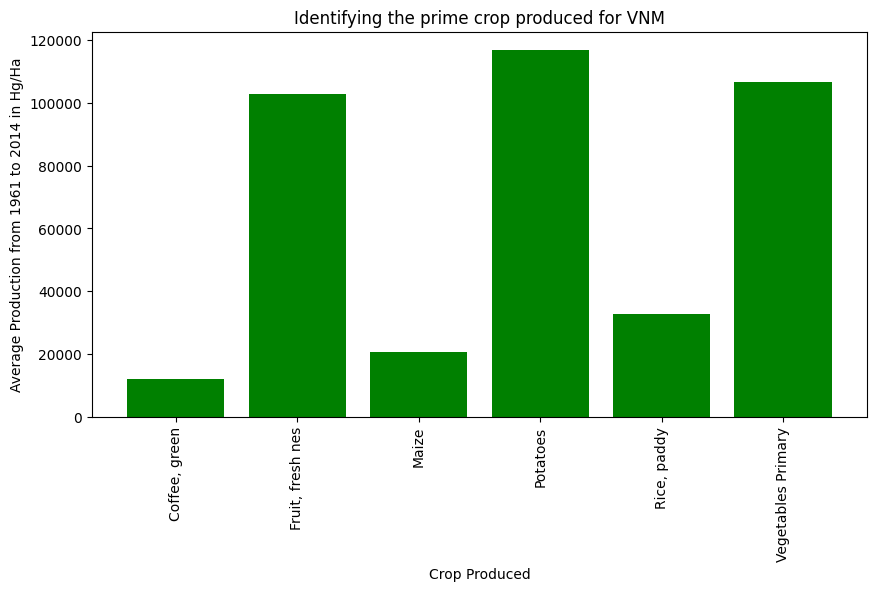

In [ ]:
for code in countryincludes:
    plotcountryfood(code)

In [ ]:
def plotfoodcountry(crop):
    countrydf = selectarea.loc[selectarea['typeName'] == crop]
    year_data = countrydf.columns[2:]
    countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
    countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')
    x = countrydf['code3']
    y = countrydf['Average Production']
    crop = crop.replace(r' yield in hg/ha', '')
    plt.title("Identifying the major producer of {}".format(crop))
    percent = 100.*y/y.sum()

    patches, texts = plt.pie(y, labels = x, startangle=90, radius=0.8)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),key=lambda x: x[2],reverse=True))

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)
    plt.show()

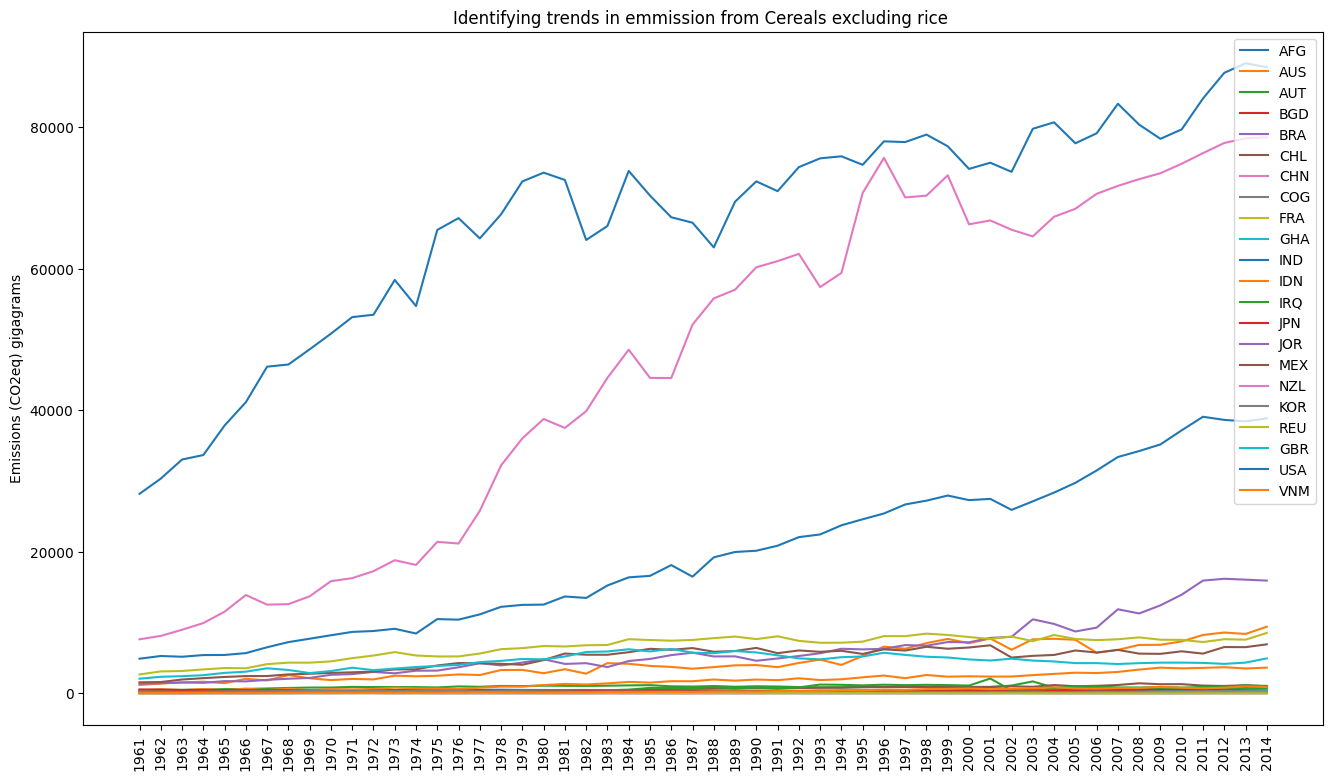

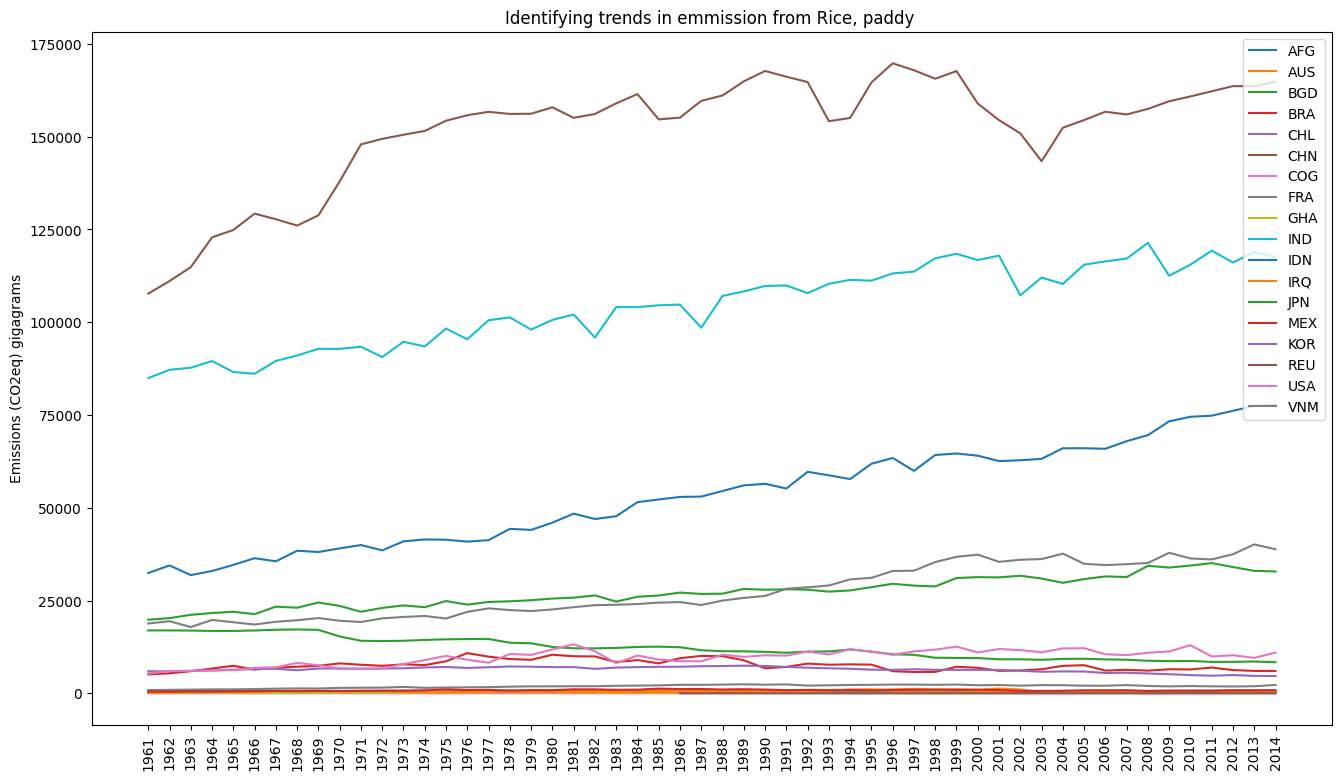

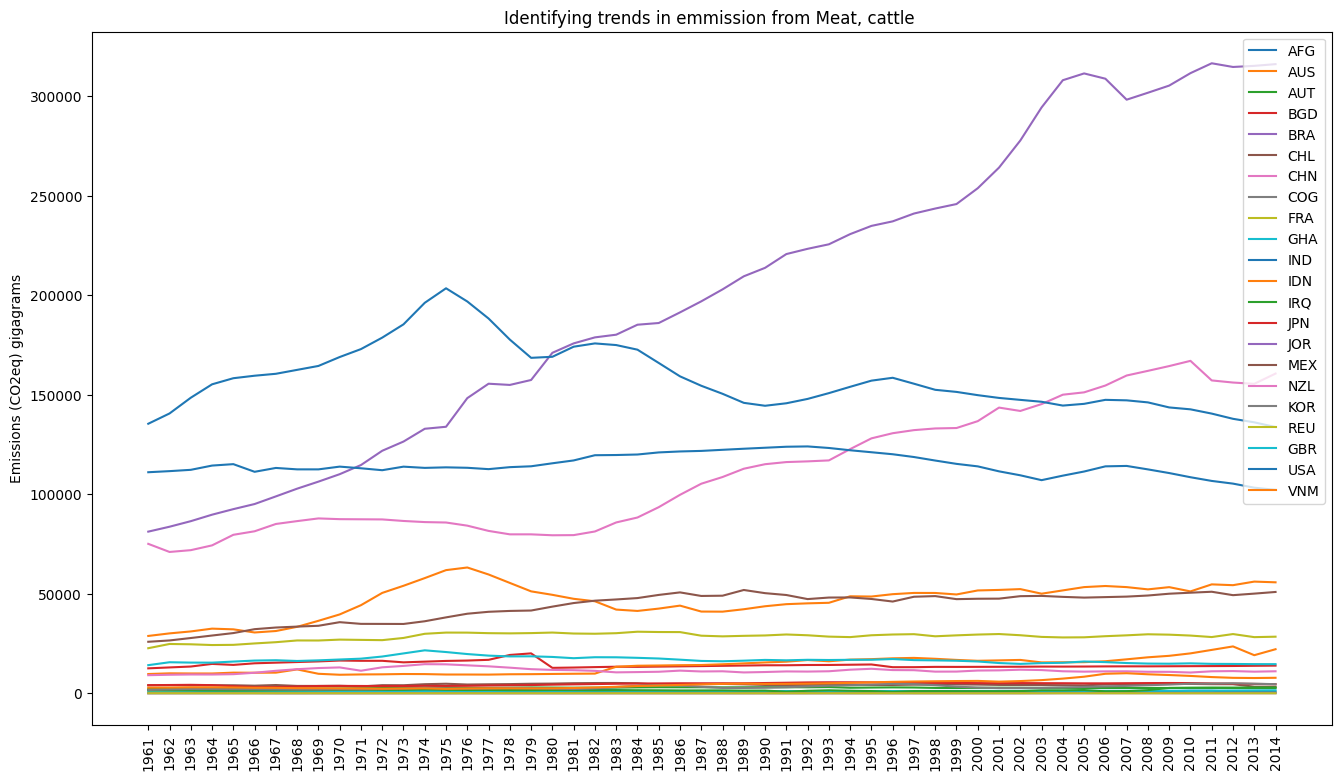

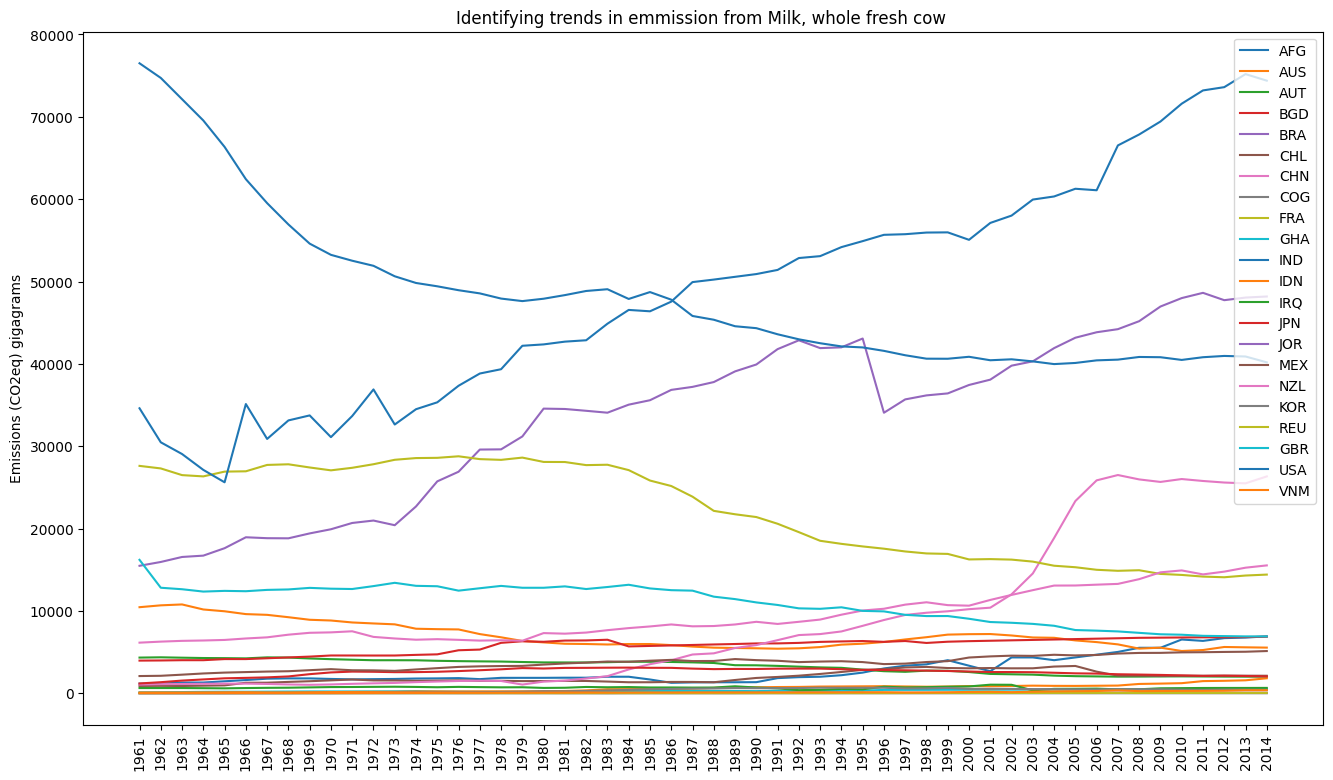

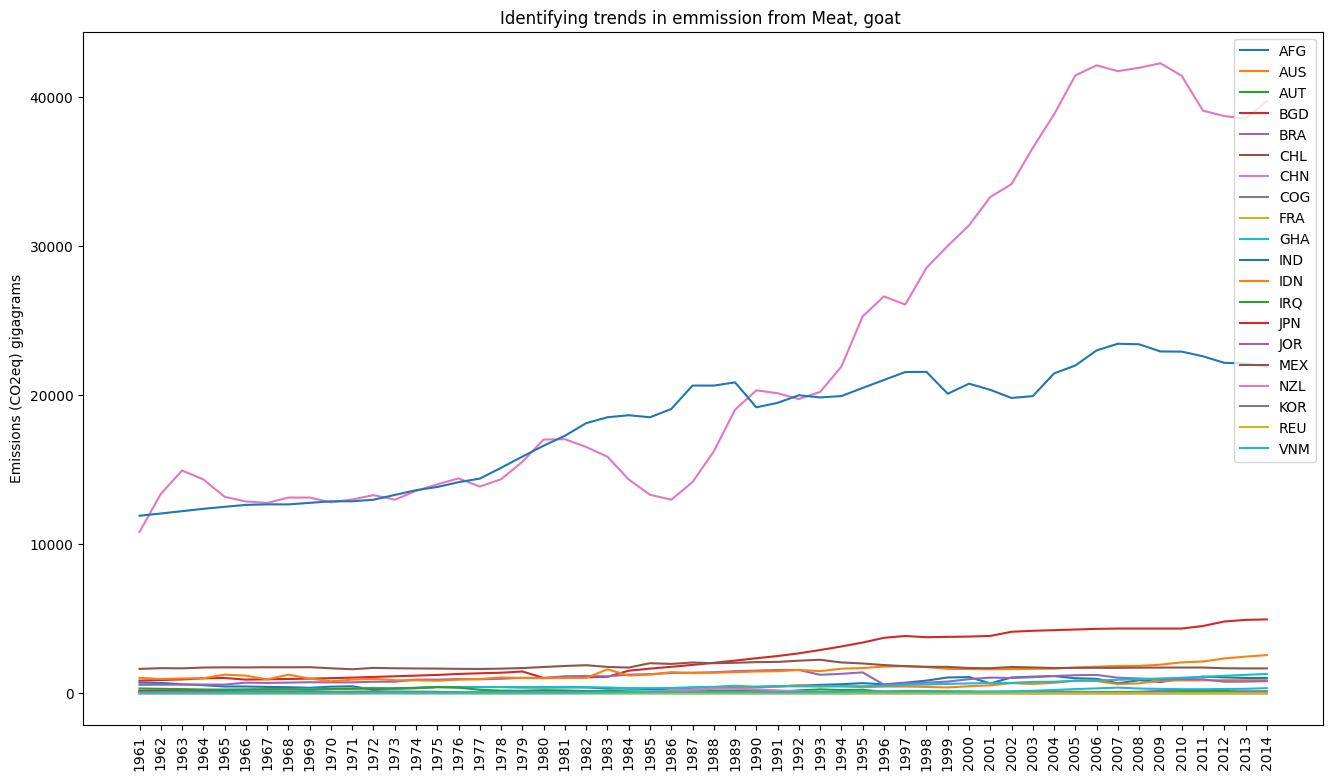

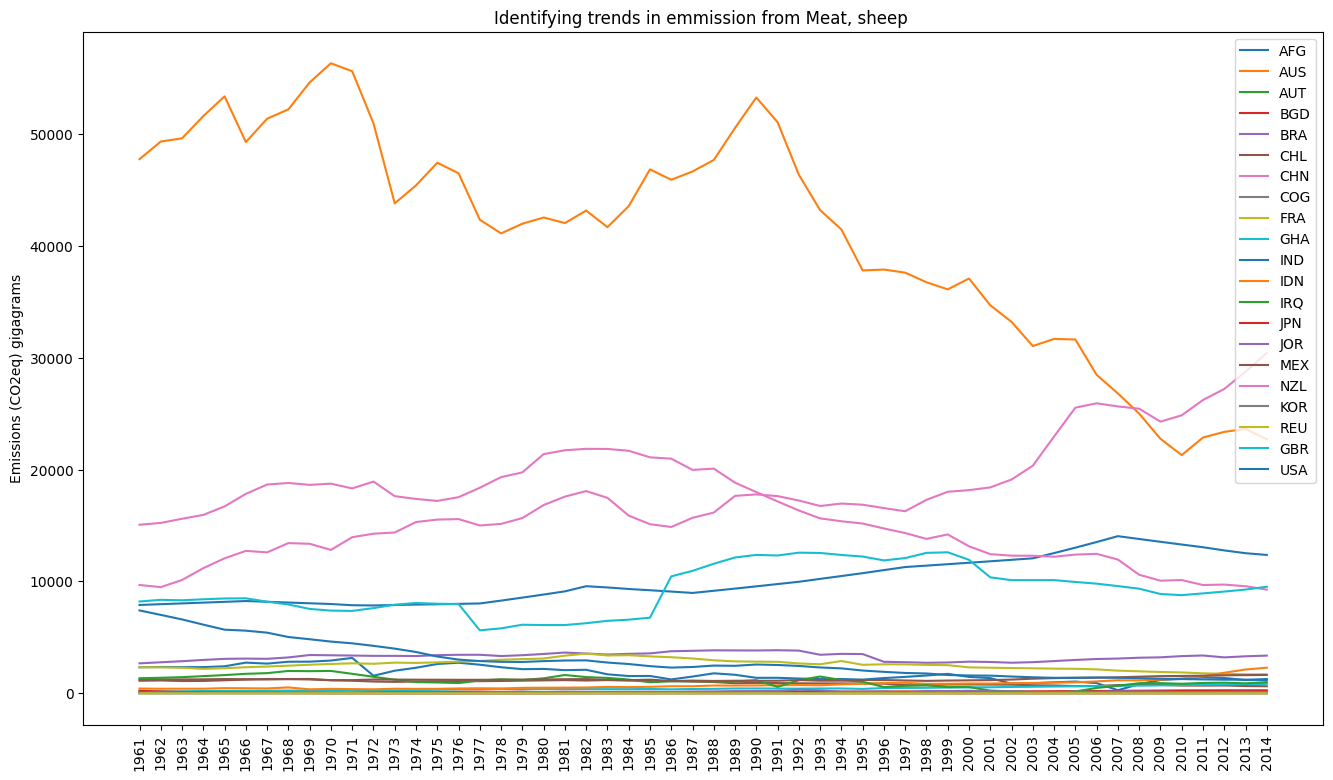

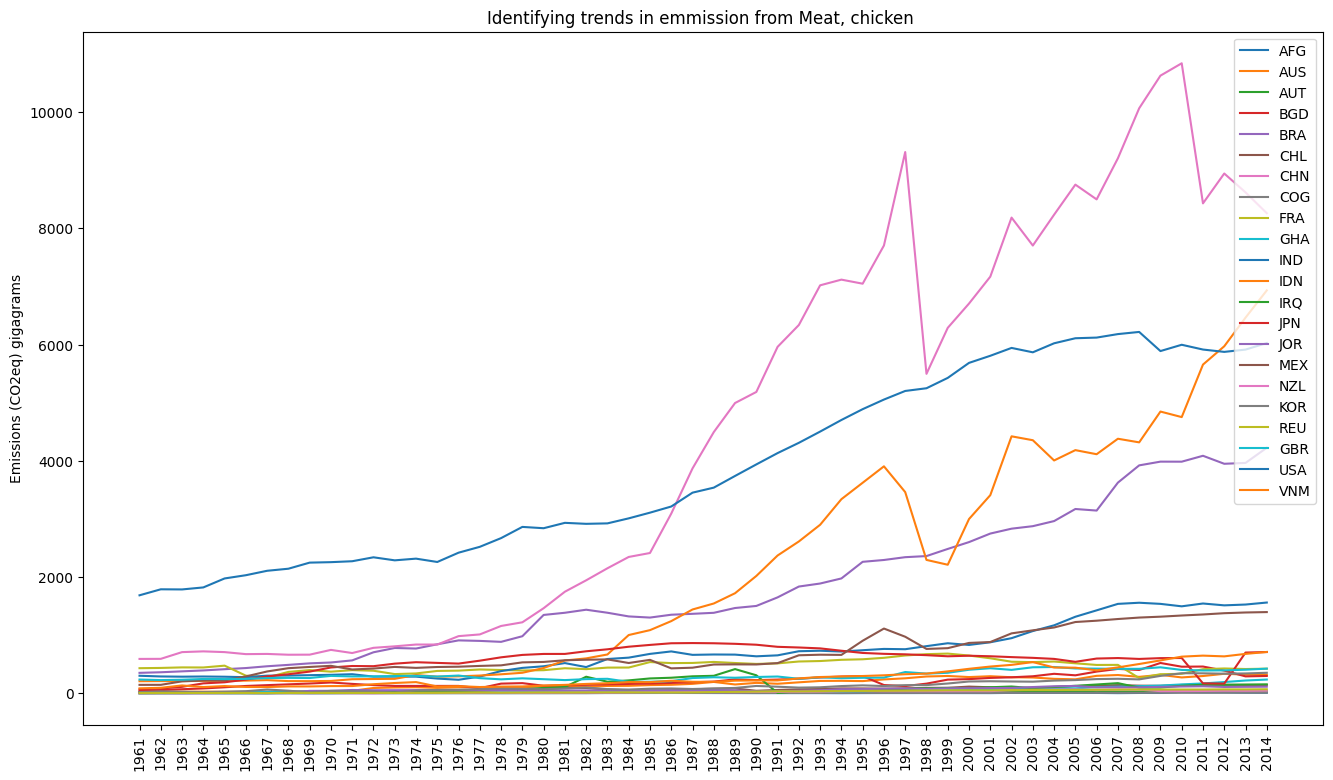

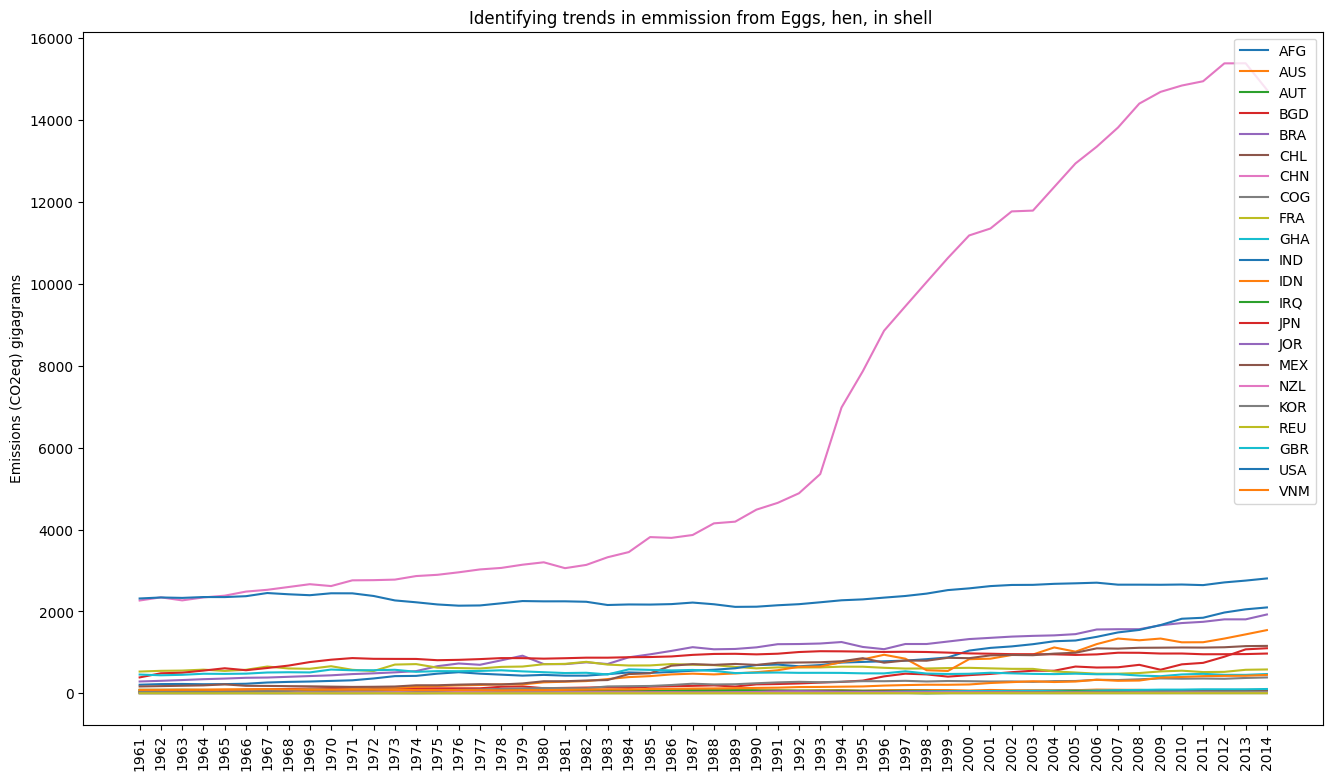

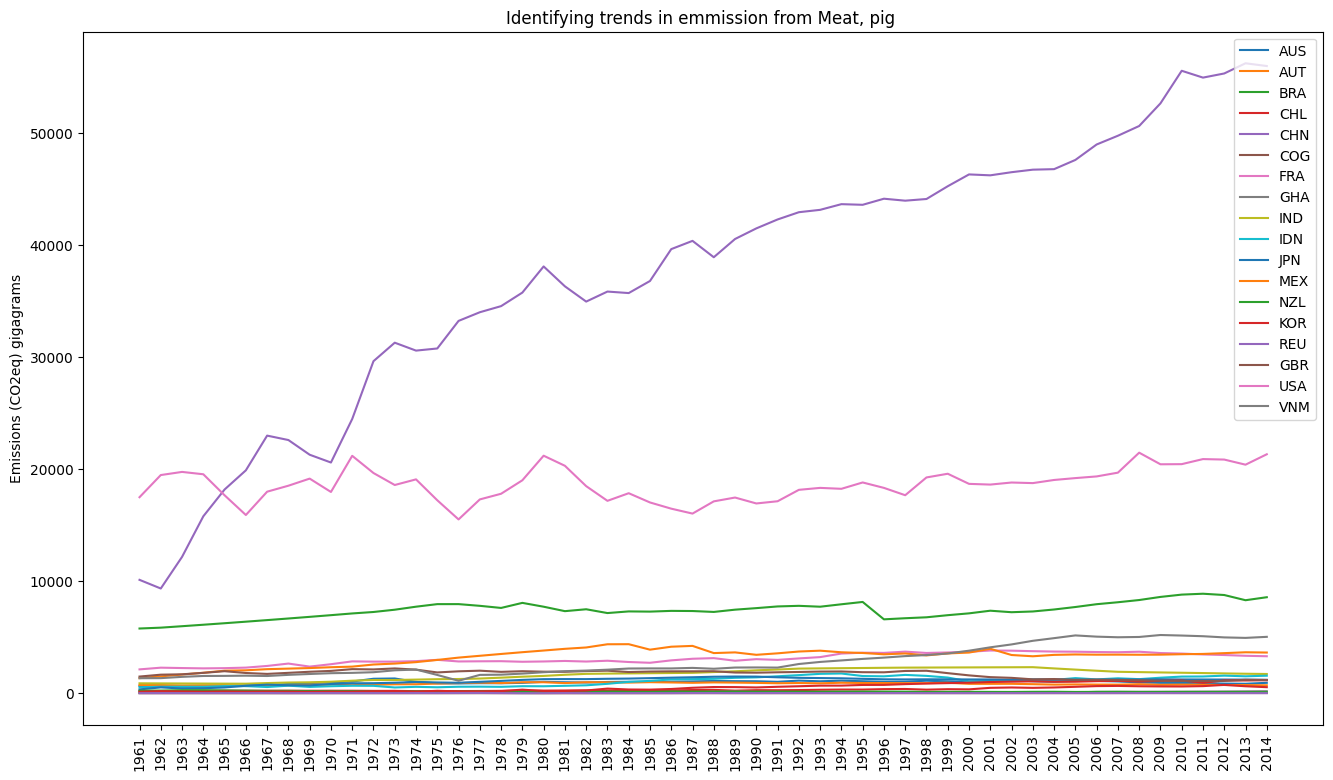

In [ ]:
def plotemissioncrop(crop):
    plt.rcParams["figure.figsize"] = [16,9]
    df = selectemission.loc[selectemission['typeName'] == crop]
  #plotting a line graph for each country
    for code in df['code3']:
        country_df = df[df['code3'] == code]
        x = country_df.columns[2:]
        y = country_df[x].values.flatten().tolist()
        plt.plot(x, y, label=code)

  #plt = plt.figure(figsize = (10, 5))
    plt.legend(loc="upper right")
    crop = crop.replace('Emissions (CO2eq) gigagrams','')
    plt.ylabel("Emissions (CO2eq) gigagrams")
    plt.title("Identifying trends in emmission from {}".format(crop))
    plt.xticks(rotation=90)
    plt.show()

crops_list = selectemission['typeName'].unique()
for crops in crops_list:
    plotemissioncrop(crops)

<ipython-input-26-fe5d8ec19fc9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
<ipython-input-26-fe5d8ec19fc9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emmission_df['Average Emmission'] = emmission_df[year_data].mean(axis = 1)
<ipython-input-26-fe5d8ec19fc9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<Axes: xlabel='Country'>

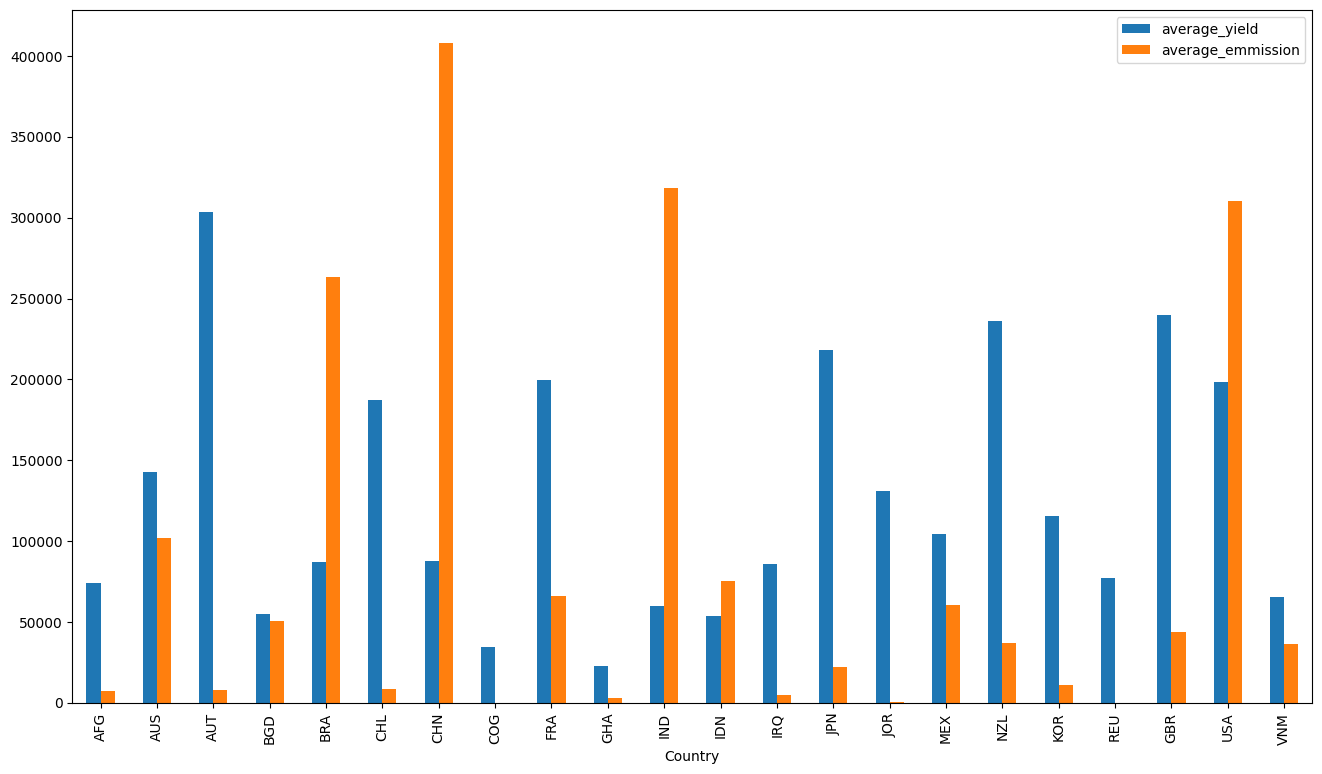

In [ ]:
average_yield =[]
average_emmission = []
for code in countryincludes:
    countrydf = selectarea.loc[selectarea['code3'] == code]
    year_data = countrydf.columns[2:]
    countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
    mean = countrydf['Average Production'].mean(axis=0)
    average_yield.append(mean)
    emmission_df = cumemission[cumemission['code3'] == code]
    year_data = cumemission.columns[2:]
    emmission_df['Average Emmission'] = emmission_df[year_data].mean(axis = 1)
    avg = emmission_df['Average Emmission']
    average_emmission.append(float(avg))

cumulativeyield = pd.DataFrame(columns=['Country','average_yield','average_emmission'], data = list(zip(countryincludes, average_yield,average_emmission)))
#cumulativeyield
fig, ax = plt.subplots()
cumulativeyield.plot.bar(x='Country', ax=ax)

In [ ]:
selectemission=selectemission.replace(np.NaN,0.0)

In [ ]:
selectemission.drop('code3', axis=1)
arri = np.zeros(shape=(9,54))
transforemission = pd.DataFrame(arri, columns= ['1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014'], index=emissionincludes)
for i in emissionincludes:
    arr = np.zeros(shape=(1,54))
    z=selectemission.drop('code3', axis=1)[selectemission.typeName==i].drop('typeName', axis=1)
    z.index = range(len(z))
    z=np.array(z)
    for j in range(len(z)):
        arr+=z[j]
    transforemission.loc[i:i] = arr
transforemission.T

,"Meat, cattle Emissions (CO2eq) gigagrams","Rice, paddy Emissions (CO2eq) gigagrams","Meat, sheep Emissions (CO2eq) gigagrams","Eggs, hen, in shell Emissions (CO2eq) gigagrams","Meat, goat Emissions (CO2eq) gigagrams",Cereals excluding rice Emissions (CO2eq) gigagrams,"Meat, pig Emissions (CO2eq) gigagrams","Meat, chicken Emissions (CO2eq) gigagrams","Milk, whole fresh cow Emissions (CO2eq) gigagrams"
1961,544026.8338,299539.5983,108002.7109,7136.6114,28581.2817,52134.8752,43575.9743,4253.3866,202651.1536
1962,555509.7796,309222.6096,109525.4502,7384.3169,31279.7441,56361.9556,45640.6427,4409.4393,194171.1643
1963,570508.8225,311202.4318,110460.1136,7386.1293,32963.4816,60317.3892,48927.8658,4691.1863,190449.7556
1964,588291.4089,325540.7195,113696.6348,7618.0241,32558.1251,63066.1054,52849.9251,4838.5364,185418.0870
1965,601194.0179,326990.9007,117212.0429,7753.6107,31678.7478,69557.2447,54075.7551,5094.0409,182700.9452
1966,605462.9044,331572.9630,115493.3797,7883.3331,31459.8187,76565.0172,54177.5186,5095.6682,190046.7087
1967,619872.2295,336690.5190,117741.7164,8241.8694,31140.2504,82054.6962,59763.7070,5406.6111,184278.2165
1968,631968.8331,340669.0451,119509.4162,8345.3667,31806.1871,84607.1300,60757.6449,5648.6549,184417.3684
1969,641530.9714,346797.5307,121130.3909,8557.8969,31648.0794,87512.3669,60171.2421,5916.2449,183533.2273
1970,657266.8858,353268.5317,121972.3308,8765.2237,31286.8245,93249.8535,59222.0159,6199.4784,180077.1672


In [ ]:
selectcrops=selectcrops.replace(np.NaN,0.0)

In [ ]:
selectcrops.drop('code3', axis=1)
arri = np.zeros(shape=(10,54))
transforcrops = pd.DataFrame(arri, columns= ['1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014'], index=cropsincludes)
for i in cropsincludes:
    arr = np.zeros(shape=(1,54))
    z=selectcrops.drop('code3', axis=1)[selectcrops.typeName==i].drop('typeName', axis=1)
    z.index = range(len(z))
    z=np.array(z)
    for j in range(len(z)):
        arr+=z[j]
    transforcrops.loc[i:i] = arr
transforcrops.T

,Apples Production in tonnes,Maize Production in tonnes,"Fruit, fresh nes Production in tonnes",Potatoes Production in tonnes,"Rice, paddy Production in tonnes",Vegetables Primary Production in tonnes,"Pulses, Total Production in tonnes",Poppy seed Production in tonnes,Sugar beet Production in tonnes,"Coffee, green Production in tonnes"
1961,7514489.0,135679365.0,2053661.0,61307578.0,175020300.0,131604741.0,0.0,2512.0,39016409.0,2513032.0
1962,10825426.0,135483797.0,2142191.0,59783872.0,182213674.0,131278724.0,0.0,2716.0,37153157.0,2498693.0
1963,8544119.0,152667863.0,2144669.0,62114099.0,200875267.0,127118684.0,0.0,2637.0,45090613.0,1996488.0
1964,9787535.0,141639823.0,2274478.0,58492472.0,215170421.0,122734006.0,0.0,2466.0,49377172.0,1405636.0
1965,9726378.0,161648074.0,2322659.0,63002547.0,208026447.0,128323937.0,0.0,1858.0,48367941.0,2668739.0
1966,8807725.0,170854224.0,2497416.0,64829161.0,213509086.0,130269313.0,0.0,1765.0,45489385.0,1613947.0
1967,9860312.0,191060232.0,2594403.0,64920752.0,228566783.0,134678792.0,0.0,1620.0,45178509.0,1981500.0
1968,9818588.0,180685324.0,2656157.0,65651465.0,236082586.0,141285075.0,0.0,1705.0,55409276.0,1503972.0
1969,10656647.0,184857616.0,2735355.0,65785170.0,239522510.0,142268170.0,0.0,1398.0,56643763.0,1720834.0
1970,10963233.0,182081397.0,2685160.0,68018886.0,257403573.0,134428243.0,0.0,1582.0,55073752.0,1209111.0


In [ ]:
transformemission, transformcrops = transforemission.T, transforcrops.T
transformdata = transformemission.merge(transformcrops, left_index=True, right_index=True)
transformdata

,"Meat, cattle Emissions (CO2eq) gigagrams","Rice, paddy Emissions (CO2eq) gigagrams","Meat, sheep Emissions (CO2eq) gigagrams","Eggs, hen, in shell Emissions (CO2eq) gigagrams","Meat, goat Emissions (CO2eq) gigagrams",Cereals excluding rice Emissions (CO2eq) gigagrams,"Meat, pig Emissions (CO2eq) gigagrams","Meat, chicken Emissions (CO2eq) gigagrams","Milk, whole fresh cow Emissions (CO2eq) gigagrams",Apples Production in tonnes,Maize Production in tonnes,"Fruit, fresh nes Production in tonnes",Potatoes Production in tonnes,"Rice, paddy Production in tonnes",Vegetables Primary Production in tonnes,"Pulses, Total Production in tonnes",Poppy seed Production in tonnes,Sugar beet Production in tonnes,"Coffee, green Production in tonnes"
1961,544026.8338,299539.5983,108002.7109,7136.6114,28581.2817,52134.8752,43575.9743,4253.3866,202651.1536,7514489.0,135679365.0,2053661.0,61307578.0,175020300.0,131604741.0,0.0,2512.0,39016409.0,2513032.0
1962,555509.7796,309222.6096,109525.4502,7384.3169,31279.7441,56361.9556,45640.6427,4409.4393,194171.1643,10825426.0,135483797.0,2142191.0,59783872.0,182213674.0,131278724.0,0.0,2716.0,37153157.0,2498693.0
1963,570508.8225,311202.4318,110460.1136,7386.1293,32963.4816,60317.3892,48927.8658,4691.1863,190449.7556,8544119.0,152667863.0,2144669.0,62114099.0,200875267.0,127118684.0,0.0,2637.0,45090613.0,1996488.0
1964,588291.4089,325540.7195,113696.6348,7618.0241,32558.1251,63066.1054,52849.9251,4838.5364,185418.0870,9787535.0,141639823.0,2274478.0,58492472.0,215170421.0,122734006.0,0.0,2466.0,49377172.0,1405636.0
1965,601194.0179,326990.9007,117212.0429,7753.6107,31678.7478,69557.2447,54075.7551,5094.0409,182700.9452,9726378.0,161648074.0,2322659.0,63002547.0,208026447.0,128323937.0,0.0,1858.0,48367941.0,2668739.0
1966,605462.9044,331572.9630,115493.3797,7883.3331,31459.8187,76565.0172,54177.5186,5095.6682,190046.7087,8807725.0,170854224.0,2497416.0,64829161.0,213509086.0,130269313.0,0.0,1765.0,45489385.0,1613947.0
1967,619872.2295,336690.5190,117741.7164,8241.8694,31140.2504,82054.6962,59763.7070,5406.6111,184278.2165,9860312.0,191060232.0,2594403.0,64920752.0,228566783.0,134678792.0,0.0,1620.0,45178509.0,1981500.0
1968,631968.8331,340669.0451,119509.4162,8345.3667,31806.1871,84607.1300,60757.6449,5648.6549,184417.3684,9818588.0,180685324.0,2656157.0,65651465.0,236082586.0,141285075.0,0.0,1705.0,55409276.0,1503972.0
1969,641530.9714,346797.5307,121130.3909,8557.8969,31648.0794,87512.3669,60171.2421,5916.2449,183533.2273,10656647.0,184857616.0,2735355.0,65785170.0,239522510.0,142268170.0,0.0,1398.0,56643763.0,1720834.0
1970,657266.8858,353268.5317,121972.3308,8765.2237,31286.8245,93249.8535,59222.0159,6199.4784,180077.1672,10963233.0,182081397.0,2685160.0,68018886.0,257403573.0,134428243.0,0.0,1582.0,55073752.0,1209111.0


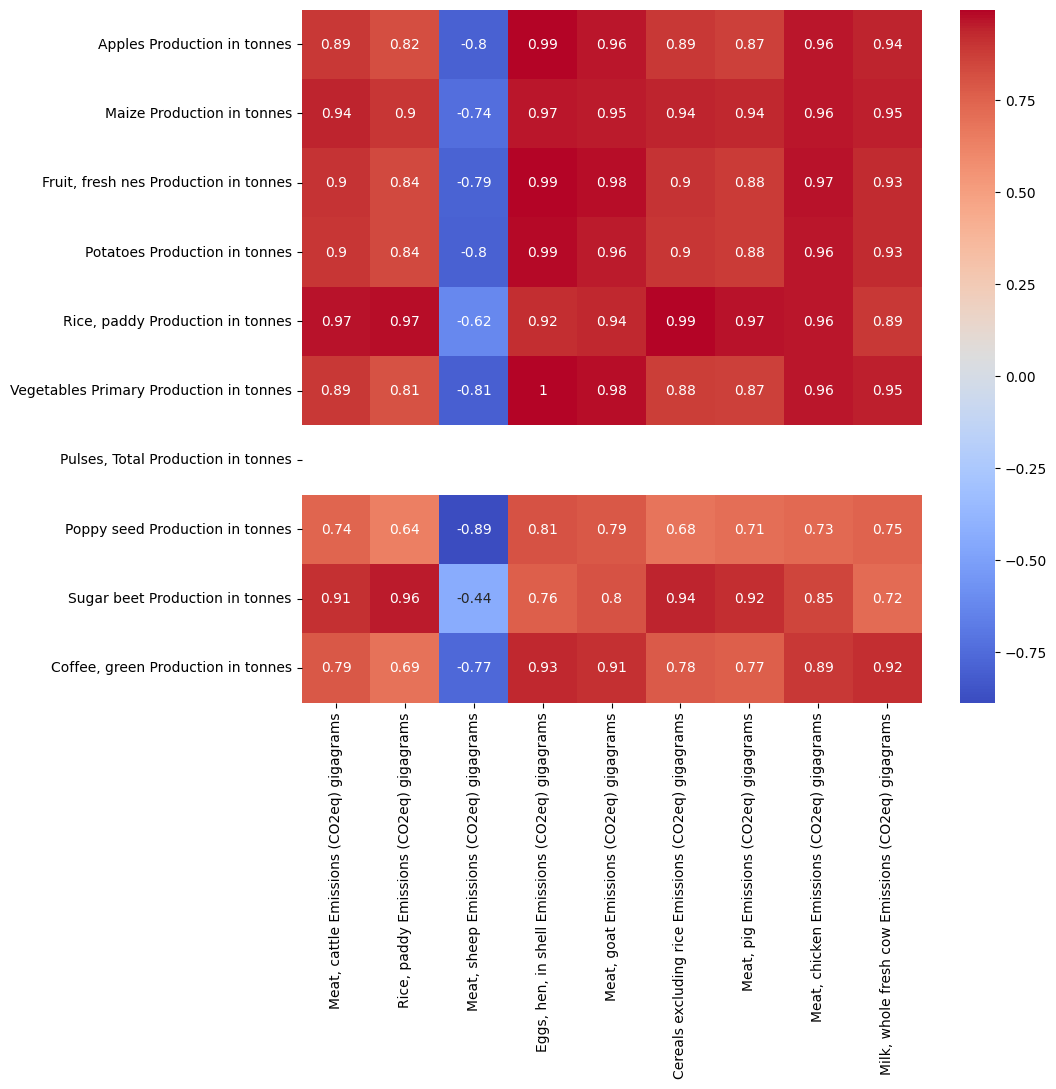

In [ ]:
import seaborn as sns
%matplotlib inline
# First let us get the correlation matrix (as a pandas dataframe)
cor = transformdata.corr()
cor = cor.drop(cor.columns[range(9)])
cor = cor.drop(cor.columns[9:], axis=1)
# We did the above three lines of code because we require correlation only between specific pairs.
# We need only between crops vs emissions and not among themselves.
plt.figure(figsize = (10,9))

sns.heatmap(cor,
            annot = True,
            cmap = 'coolwarm')
plt.show()

In [ ]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
